# Variable Imputation : Train
'full_sq', 'life_sq', 'num_room'

In [33]:
# pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 2500)
pd.set_option('display.max_columns', 105)
# pd.set_option('display.width', 105)

In [87]:
train = pd.read_csv('dss-regression-datasets/project-sberbank-housing-market-data/train.csv')
test = 

In [28]:
train[['full_sq', 'num_room', 'life_sq']].corr()

full_sq  num_room   life_sq
full_sq   1.000000  0.706379  0.342956
num_room  0.706379  1.000000  0.567935
life_sq   0.342956  0.567935  1.000000

### 3 factors shows high cor-val 

 so,,
 1. Fill & Correct all full_sq with list_sq, num_room
 2. Fill & Correct all num_room  '''
 3. Fill & Correct all life_sq '''

# About full_sq

In [29]:
#get full_sq < life_sq value and correct
sqfilter = (train['full_sq']-train['life_sq']) < 0
full_sq_target = train[['full_sq', 'life_sq']][sqfilter]
full_sq_target['full_sq'] = full_sq_target['life_sq'] + 19 # 19 is average diff of two
full_sq_target[['full_sq']]

full_sq
820       63.0
1286      57.0
1315     197.0
3069     445.0
4592     107.0
4927      96.0
5078     214.0
5729      57.0
6539     477.0
6693      72.0
6811     821.0
8272      77.0
8325      78.0
8896      79.0
9758     182.0
11359     71.0
14629     64.0
14922    368.0
15875     66.0
16159     74.0
17206     96.0
17300     97.0
18672    454.0
18686     83.0
20738     76.0

In [30]:
# override full_sq_target with combine_first function
treated = full_sq_target.combine_first(train)
treated.shape

(21570, 292)

In [31]:
# fill low-full_sq val with num_room, 38.64 is mean full_sq of sample which have 1 room
lowfull = treated[['full_sq', 'num_room', 'life_sq']][treated['full_sq'] < 10]
lowfull['full_sq'] = 38.64
lowfull

full_sq  num_room  life_sq
4282     38.64       NaN      NaN
11519    38.64       1.0      1.0
11840    38.64       1.0      1.0
12148    38.64       1.0      1.0
15703    38.64       1.0      1.0
16208    38.64       1.0      1.0
16335    38.64       1.0      1.0
16691    38.64       1.0      1.0
16809    38.64       1.0      1.0
17449    38.64       1.0      1.0
17640    38.64       1.0      1.0
18124    38.64       1.0      1.0
18343    38.64       1.0      1.0
18705    38.64       1.0      1.0
18847    38.64       1.0      1.0

In [32]:
# override it
treated2 = lowfull.combine_first(treated)
print(treated2.loc[lowfull.index]['full_sq']) # check
print()
print(treated2.loc[full_sq_target.index]['full_sq']) # check

4282     38.64
11519    38.64
11840    38.64
12148    38.64
15703    38.64
16208    38.64
16335    38.64
16691    38.64
16809    38.64
17449    38.64
17640    38.64
18124    38.64
18343    38.64
18705    38.64
18847    38.64
Name: full_sq, dtype: float64

820       63.0
1286      57.0
1315     197.0
3069     445.0
4592     107.0
4927      96.0
5078     214.0
5729      57.0
6539     477.0
6693      72.0
6811     821.0
8272      77.0
8325      78.0
8896      79.0
9758     182.0
11359     71.0
14629     64.0
14922    368.0
15875     66.0
16159     74.0
17206     96.0
17300     97.0
18672    454.0
18686     83.0
20738     76.0
Name: full_sq, dtype: float64


In [33]:
#full_sq null check
treated2['full_sq'].isnull().sum()

0

# About num_room

In [34]:
# check change of full_sq depending on num_room, maybe num_room shows error
treated2_3 = treated2[['full_sq', 'num_room', 'life_sq']]
treated2[['full_sq', 'num_room']].groupby('num_room').mean()

full_sq
num_room            
0.0        85.555556
1.0        38.737785
2.0        54.100932
3.0        75.510376
4.0       101.154605
5.0       125.375000
6.0       160.375000
8.0       173.000000
10.0       59.000000
17.0       51.000000
19.0       40.000000

In [35]:
# cause it is about apartment, consider num_room 0 as error, too
error_num_room = treated2[['num_room', 'full_sq', 'life_sq']][treated2['num_room'] == 0.0]
error_num_room

num_room  full_sq  life_sq
7392        0.0     48.0      NaN
7905        0.0     40.0      NaN
8330        0.0     54.0      NaN
12795       0.0    112.0    112.0
13176       0.0    209.0    209.0
14627       0.0     79.0      NaN
17024       0.0    164.0      NaN
17631       0.0     34.0     19.0
17980       0.0     30.0     18.0

In [36]:
# handle num_room rows which have Null and  0 value, total 6782
treated2_target = treated2[['full_sq','life_sq', 'num_room']][treated2['num_room'].isnull()]
treated2_target = pd.concat([error_num_room, treated2_target], axis=0)
len(treated2_target['full_sq'])

6782

In [37]:
# give num_room 1.0 to rows which show full_sq < 39
# considr average diff with increasing num_room as """ 15 m2 per num_room 1 """"""
# there's some outliers in full_sq so this treatment makes outliers, too. But, there's dropping function.
for i in treated2_target.index:
    if treated2_target.loc[i]['full_sq'] < 39:
        treated2_target.loc[i]['num_room'] = 1.0
    else:
        temp = float(int((treated2_target.loc[i]['full_sq'] - 20) / 19) + 1) # **** 
        treated2_target.loc[i]['num_room'] = temp


In [38]:
#check num_room null
treated2_target.isnull().sum()

full_sq        0
life_sq     1602
num_room       0
dtype: int64

# About life_sq

In [63]:
#override it, and check null of life_sq
treated3 = treated2_target.combine_first(treated2)
print(treated3.shape)
treated3[['full_sq','life_sq', 'num_room']].isnull().sum()

(21570, 292)


full_sq        0
life_sq     4539
num_room       0
dtype: int64

In [49]:
error_life_sq = treated3[['full_sq', 'life_sq', 'num_room']][treated3['life_sq'] < 10]
treated3_target = treated3[['full_sq', 'life_sq', 'num_room']][treated3['life_sq'].isnull()]
treated3_target = pd.concat([treated3_target, error_life_sq], axis=0)
treated3_target[treated3_target['full_sq'] < 30] # check

full_sq  life_sq  num_room
2366      29.0      NaN       1.0
2615      22.0      NaN       1.0
2834      27.0      NaN       1.0
3379      28.0      NaN       1.0
3725      26.0      NaN       1.0
3839      27.0      NaN       1.0
4200      29.0      NaN       1.0
4472      29.0      NaN       1.0
4500      26.0      NaN       1.0
4882      29.0      NaN       1.0
4980      26.0      NaN       1.0
5071      19.0      NaN       1.0
5149      26.0      NaN       1.0
5336      26.0      NaN       1.0
5472      29.0      NaN       1.0
5830      29.0      NaN       1.0
5888      29.0      NaN       1.0
5929      29.0      NaN       1.0
5971      29.0      NaN       1.0
5983      29.0      NaN       1.0
6208      29.0      NaN       1.0
6220      29.0      NaN       1.0
6280      29.0      NaN       1.0
6428      29.0      NaN       1.0
6481      29.0      NaN       1.0
7019      29.0      NaN       1.0
7139      29.0      NaN       1.0
8188      29.0      NaN       1.0
8394      29.0      NaN       1.0
8449      29.0      NaN       1.0
...        ...      ...       ...
18674     27.0      NaN       1.0
18999     29.0      NaN       1.0
19219     27.0      NaN       1.0
19281     27.0      NaN       1.0
19356     27.0      NaN       1.0
19663     28.0      NaN       1.0
19705     29.0      NaN       1.0
20488     27.0      NaN       1.0
20878     28.0      NaN       1.0
20927     28.0      NaN       1.0
21070     26.0      NaN       1.0
21195     29.0      NaN       1.0
21374     27.0      NaN       1.0
68        26.0      1.0       1.0
4165      13.0      8.0       1.0
4571      26.0      9.0       1.0
5378      14.0      9.0       1.0
6620      14.0      9.0       1.0
9733      26.0      9.0       1.0
12140     28.0      1.0       1.0
12544     27.0      1.0       1.0
13759     14.0      9.0       1.0
14813     13.0      9.0       1.0
15018     13.0      8.0       1.0
16980     28.0      1.0       1.0
16986     27.0      1.0       1.0
17219     12.0      8.0       1.0
17702     15.0      9.0       1.0
18068     27.0      1.0       1.0
20627     12.0      8.0       1.0

[102 rows x 3 columns]

In [50]:
treated3_target.shape #check

(4879, 3)

In [51]:
treated3['diff'] = treated3['full_sq'] - treated3['life_sq']
temp = treated3[['full_sq', 'diff']].groupby('full_sq').mean()
temp

diff
full_sq             
10.00       0.000000
11.00       0.000000
12.00       4.000000
13.00       2.000000
14.00       3.333333
15.00       3.400000
16.00       4.833333
17.00       4.857143
18.00       4.117647
19.00       5.000000
20.00       8.000000
21.00       8.285714
22.00       4.800000
23.00       7.000000
24.00      10.384615
25.00       9.857143
26.00       9.714286
27.00       8.120000
28.00      11.769231
29.00       9.684615
30.00      12.079245
31.00      11.323864
32.00      13.116554
33.00      13.927885
34.00      13.335958
35.00      15.533981
36.00      15.330357
37.00      15.326897
38.00      16.502646
38.64      37.640000
...              ...
193.00     80.000000
195.00     76.000000
197.00      6.333333
199.00     42.000000
202.00     87.000000
204.00      7.000000
206.00     75.000000
208.00     86.000000
209.00      0.000000
211.00     76.000000
214.00     19.000000
215.00     81.000000
216.00     95.000000
219.00    101.000000
220.00     44.000000
226.00    132.000000
291.00    102.000000
303.00           NaN
325.00      0.000000
353.00    333.000000
368.00     19.000000
388.00           NaN
394.00    377.000000
407.00      0.000000
445.00     19.000000
454.00     19.000000
477.00     19.000000
634.00           NaN
821.00     19.000000
5326.00  5304.000000

[197 rows x 1 columns]

In [52]:
temp1 = treated3['life_sq'] / treated3['full_sq'] 
temp1 = temp1.notnull()
temp1.mean()


0.78956884561891516

In [53]:
# consider 0.78 = 0.8 = 4 /5, fill life_sq with full_sq
for i in treated3_target.index:
    if treated3_target.loc[i]['full_sq'] < 25:
        treated3_target.loc[i]['life_sq'] = treated3_target.loc[i]['full_sq']
    else:
        treated3_target.loc[i]['life_sq'] = treated3_target.loc[i]['full_sq'] - (treated3_target.loc[i]['full_sq'] / 5)

treated3_target.shape

(4879, 3)

In [58]:
print(treated3_target.isnull().sum())
treated3_target

full_sq     0
life_sq     0
num_room    0
dtype: int64


full_sq  life_sq  num_room
381       73.0     58.4       3.0
431      110.0     88.0       5.0
545      167.0    133.6       8.0
578       53.0     42.4       2.0
585       81.0     64.8       4.0
654      166.0    132.8       8.0
674      167.0    133.6       8.0
682      123.0     98.4       6.0
693      155.0    124.0       8.0
698      101.0     80.8       5.0
934       83.0     66.4       4.0
948      123.0     98.4       6.0
949      166.0    132.8       8.0
963       89.0     71.2       4.0
992       53.0     42.4       2.0
1046      40.0     32.0       2.0
1058      74.0     59.2       3.0
1072     142.0    113.6       7.0
1151     155.0    124.0       8.0
1192     169.0    135.2       8.0
1196      88.0     70.4       4.0
1284      75.0     60.0       3.0
1316      90.0     72.0       4.0
1365      89.0     71.2       4.0
1438      83.0     66.4       4.0
1483      67.0     53.6       3.0
1554      39.0     31.2       2.0
1586      76.0     60.8       3.0
1593     142.0    113.6       7.0
1595     155.0    124.0       8.0
...        ...      ...       ...
20793    104.0     83.2       3.0
20896     62.0     49.6       2.0
20907     55.0     44.0       2.0
20925     66.0     52.8       2.0
20930     65.0     52.0       2.0
20983     36.0     28.8       1.0
21013     49.0     39.2       1.0
21063     50.0     40.0       1.0
21185     34.0     27.2       1.0
21222     42.0     33.6       1.0
21236     63.0     50.4       2.0
21253     54.0     43.2       1.0
21271     41.0     32.8       1.0
21317     53.0     42.4       2.0
21353    107.0     85.6       3.0
21366     31.0     24.8       2.0
21407     64.0     51.2       2.0
21417     39.0     31.2       1.0
21432     78.0     62.4       3.0
21449    104.0     83.2       3.0
21462     47.0     37.6       1.0
21482     50.0     40.0       1.0
21493     37.0     29.6       1.0
21501     54.0     43.2       2.0
21508     38.0     30.4       1.0
21534     85.0     68.0       3.0
21543     82.0     65.6       3.0
21548    113.0     90.4       4.0
21557     45.0     36.0       1.0
21560     50.0     40.0       1.0

[4879 rows x 3 columns]

In [64]:
train_df_treated_20171021 = treated3_target.combine_first(treated3)
train_df_treated_20171021.shape

(21570, 292)

In [65]:
train_df_treated_20171021[['full_sq', 'life_sq', 'num_room']].isnull().sum()

full_sq     0
life_sq     0
num_room    0
dtype: int64

In [67]:
train_df_treated_20171021[['full_sq', 'life_sq', 'num_room']].head(n=500)

full_sq  life_sq  num_room
0       34.0     19.0       1.0
1       89.0     50.0       4.0
2       77.0     77.0       4.0
3       25.0     14.0       1.0
4       44.0     44.0       2.0
5       42.0     27.0       2.0
6       36.0     21.0       1.0
7       36.0     19.0       1.0
8       38.0     19.0       1.0
9       43.0     28.0       2.0
10      31.0     31.0       1.0
11      31.0     21.0       1.0
12      47.0     31.0       2.0
13      44.0     29.0       2.0
14      39.0     39.0       2.0
15      45.0     29.0       2.0
16      35.0     20.0       1.0
17      38.0     20.0       1.0
18      73.0     38.0       3.0
19      42.0     27.0       2.0
20      40.0     20.0       2.0
21      38.0     34.0       1.0
22      31.0     18.0       1.0
23      39.0     19.0       2.0
24      33.0     18.0       1.0
25      33.0     18.0       1.0
26      42.0     22.0       2.0
27      38.0     23.0       1.0
28      44.0     28.0       2.0
29      37.0     19.0       1.0
..       ...      ...       ...
470     32.0     14.0       1.0
471     40.0     20.0       2.0
472     43.0     19.0       2.0
473     52.0     30.0       2.0
474     29.0     28.0       1.0
475     44.0     29.0       2.0
476     44.0     28.0       2.0
477     59.0     37.0       3.0
478     49.0     34.0       2.0
479     56.0     41.0       2.0
480     73.0     45.0       3.0
481     41.0     18.0       2.0
482     42.0     26.0       2.0
483     32.0     20.0       1.0
484     51.0     28.0       2.0
485     40.0     14.0       2.0
486     78.0     39.0       4.0
487     78.0     46.0       4.0
488     59.0     33.0       3.0
489     72.0     44.0       3.0
490     78.0     43.0       4.0
491     34.0     19.0       1.0
492     62.0     39.0       3.0
493     53.0     30.0       2.0
494     38.0     19.0       1.0
495     57.0     33.0       2.0
496     57.0     30.0       2.0
497     72.0     44.0       3.0
498     51.0     30.0       2.0
499     34.0     19.0       1.0

[500 rows x 3 columns]

# Sending!

In [68]:
train_df_treated_20171021.to_csv('train_df_treated_20171021.csv', index=False)

# Additional imputation (20171023) on build_year, state

In [13]:
train_treated_df_20171021 = pd.read_csv('train_df_treated_20171021.csv')
train_treated_df_20171021.shape

(21570, 292)

In [14]:
build_year_replacer_df = train_treated_df_20171021[['sub_area', 'build_year']].groupby('sub_area').aggregate(np.mean)
build_year_replacer_df.reset_index()

sub_area     build_year
0                 Ajeroport    1964.481481
1            Akademicheskoe    1959.972973
2              Alekseevskoe    1969.437500
3              Altuf'evskoe    1976.941176
4                     Arbat    1955.250000
5             Babushkinskoe    1973.744186
6                 Basmannoe    1956.960000
7                   Begovoe    1964.481481
8           Beskudnikovskoe    1969.231707
9                  Bibirevo    1978.533898
10     Birjulevo Vostochnoe    1972.476510
11       Birjulevo Zapadnoe    1979.706897
12              Bogorodskoe    1975.157143
13                 Brateevo    1949.826531
14                Butyrskoe    1975.937500
15                 Caricyno    1969.916667
16              Cheremushki  284373.366197
17   Chertanovo Central'noe    1927.013158
18       Chertanovo Juzhnoe    1980.326733
19      Chertanovo Severnoe    1958.562500
20              Danilovskoe    1944.620000
21              Dmitrovskoe    1980.440860
22                  Donskoe    1937.218182
23             Dorogomilovo    1960.080000
24           Filevskij Park    1988.052632
25           Fili Davydkovo    1974.243243
26              Gagarinskoe    1964.658537
27               Gol'janovo    1977.147887
28              Golovinskoe    1974.954128
29                Hamovniki    1954.020833
..                      ...            ...
116      Severnoe Izmajlovo    1973.480519
117     Severnoe Medvedkovo    1957.461538
118        Severnoe Tushino    1924.562500
119                Shhukino    1968.272727
120                  Silino    1984.865385
121                   Sokol    1969.475000
122              Sokol'niki    1961.718750
123         Sokolinaja Gora    1995.553398
124                Solncevo    1570.827815
125         Staroe Krjukovo    1986.085714
126                Strogino    1944.943089
127                Sviblovo    1989.194444
128               Taganskoe    1982.571429
129          Tekstil'shhiki    1934.610000
130             Teplyj Stan    1930.202381
131          Timirjazevskoe    1921.164557
132          Troickij okrug    1866.631579
133      Troparevo-Nikulino    1988.508772
134                Tverskoe    1648.833333
135               Veshnjaki    1882.598131
136                 Vnukovo    1975.200000
137              Vojkovskoe    1969.615385
138              Vostochnoe    1976.400000
139     Vostochnoe Degunino    1983.343284
140    Vostochnoe Izmajlovo    1965.500000
141        Vyhino-Zhulebino    1967.928571
142          Zamoskvorech'e    1969.909091
143       Zapadnoe Degunino    1726.513514
144              Zjablikovo    1980.568966
145                 Zjuzino    1963.966387

[146 rows x 2 columns]

In [15]:
train_treated_df_20171021.loc[train_treated_df_20171021['build_year'].apply(lambda x: x < 1900 or x > 2015), \
                              'build_year'] = int(train_treated_df_20171021['build_year'].median())

In [28]:
build_year_replacer_df2 = train_treated_df_20171021[['sub_area', 'build_year']].groupby('sub_area').aggregate(np.mean)
build_year_replacer_df2

build_year
sub_area                           
Ajeroport               1964.481481
Akademicheskoe          1977.792793
Alekseevskoe            1969.437500
Altuf'evskoe            1976.941176
Arbat                   1955.250000
Babushkinskoe           1973.744186
Basmannoe               1956.960000
Begovoe                 1964.481481
Beskudnikovskoe         1993.353659
Bibirevo                1978.533898
Birjulevo Vostochnoe    1985.751678
Birjulevo Zapadnoe      1979.706897
Bogorodskoe             1975.157143
Brateevo                1990.193878
Butyrskoe               1975.937500
Caricyno                1969.916667
Cheremushki             1978.577465
Chertanovo Central'noe  1979.065789
Chertanovo Juzhnoe      1980.326733
Chertanovo Severnoe     1979.177083
Danilovskoe             1965.750000
Dmitrovskoe             1980.440860
Donskoe                 1973.200000
Dorogomilovo            1960.080000
Filevskij Park          1983.157895
Fili Davydkovo          1974.243243
Gagarinskoe             1964.658537
Gol'janovo              1977.147887
Golovinskoe             1974.275229
Hamovniki               1955.958333
...                             ...
Severnoe Izmajlovo      1973.480519
Severnoe Medvedkovo     1982.820513
Severnoe Tushino        1977.562500
Shhukino                1968.272727
Silino                  1984.865385
Sokol                   1969.475000
Sokol'niki              1961.718750
Sokolinaja Gora         1966.563107
Solncevo                1988.940397
Staroe Krjukovo         1986.085714
Strogino                1993.203252
Sviblovo                1982.375000
Taganskoe               1982.571429
Tekstil'shhiki          1973.800000
Teplyj Stan             1977.309524
Timirjazevskoe          1971.253165
Troickij okrug          1995.894737
Troparevo-Nikulino      1988.508772
Tverskoe                1995.581081
Veshnjaki               1975.065421
Vnukovo                 1975.200000
Vojkovskoe              1969.615385
Vostochnoe              1976.400000
Vostochnoe Degunino     1983.343284
Vostochnoe Izmajlovo    1965.500000
Vyhino-Zhulebino        1982.057143
Zamoskvorech'e          1969.909091
Zapadnoe Degunino       1992.585586
Zjablikovo              1980.568966
Zjuzino                 1980.588235

[146 rows x 1 columns]

In [17]:
train_treated_df_20171021['year'] = train_treated_df_20171021['timestamp'].apply(lambda x : x[:4])

In [18]:
train_by_target = train_treated_df_20171021.loc[train_treated_df_20171021['build_year'].isnull(), ['sub_area', 'build_year']]
train_by_target

sub_area  build_year
0              Nagatinskij Zaton         NaN
1                         Mitino         NaN
2                      Basmannoe         NaN
3                     Sokol'niki         NaN
4                       Bibirevo         NaN
5                        Koptevo         NaN
6                        Kuncevo         NaN
7               Kosino-Uhtomskoe         NaN
8              Zapadnoe Degunino         NaN
9                        Kuncevo         NaN
10                   Presnenskoe         NaN
11                     Lefortovo         NaN
12                     Kuz'minki         NaN
13                    Gol'janovo         NaN
14               Juzhnoe Tushino         NaN
15                Fili Davydkovo         NaN
16                      Otradnoe         NaN
17              Novo-Peredelkino         NaN
18                   Bogorodskoe         NaN
19                  Jaroslavskoe         NaN
20                      Strogino         NaN
21                      Bibirevo         NaN
22         Moskvorech'e-Saburovo         NaN
23               Staroe Krjukovo         NaN
24                     Veshnjaki         NaN
25                     Veshnjaki         NaN
26                        Mitino         NaN
27          Vostochnoe Izmajlovo         NaN
28                  Jaroslavskoe         NaN
29             Zapadnoe Degunino         NaN
...                          ...         ...
21468        Poselenie Sosenskoe         NaN
21471       Poselenie Vnukovskoe         NaN
21473  Poselenie Novofedorovskoe         NaN
21484       Poselenie Vnukovskoe         NaN
21488       Poselenie Shherbinka         NaN
21491       Poselenie Vnukovskoe         NaN
21492       Poselenie Moskovskij         NaN
21493   Poselenie Filimonkovskoe         NaN
21495                  Izmajlovo         NaN
21499          Nagatinskij Zaton         NaN
21508       Ochakovo-Matveevskoe         NaN
21511                   Nagornoe         NaN
21513                   Solncevo         NaN
21515       Poselenie Vnukovskoe         NaN
21519       Poselenie Vnukovskoe         NaN
21521       Poselenie Vnukovskoe         NaN
21522       Poselenie Moskovskij         NaN
21523     Poselenie Pervomajskoe         NaN
21524                Danilovskoe         NaN
21527        Poselenie Sosenskoe         NaN
21528                  Izmajlovo         NaN
21530       Poselenie Moskovskij         NaN
21531          Zapadnoe Degunino         NaN
21538        Poselenie Sosenskoe         NaN
21546          Nagatinskij Zaton         NaN
21550                   Solncevo         NaN
21553       Poselenie Moskovskij         NaN
21554                   Otradnoe         NaN
21561                   Solncevo         NaN
21567       Poselenie Vnukovskoe         NaN

[9621 rows x 2 columns]

In [29]:
train_by_target_result_df = pd.merge(train_by_target, build_year_replacer_df2, left_on='sub_area', right_index=True, how='left')
train_by_target_result_df_drop_former = train_by_target_result_df.drop(['build_year_x'], axis=1)
print(train_by_target_result_df_drop_former.isnull().sum())
train_by_target_result_df_drop_former.columns = ['sub_area', 'build_year']
train_by_target_result_df_drop_former.columns

sub_area        0
build_year_y    0
dtype: int64


Index(['sub_area', 'build_year'], dtype='object')

In [31]:
train_by_target_result_df_drop_former.loc[train_by_target_result_df_drop_former['sub_area'] == 'Cheremushki', :]

sub_area   build_year
166   Cheremushki  1978.577465
354   Cheremushki  1978.577465
715   Cheremushki  1978.577465
830   Cheremushki  1978.577465
885   Cheremushki  1978.577465
907   Cheremushki  1978.577465
1091  Cheremushki  1978.577465
1156  Cheremushki  1978.577465
1289  Cheremushki  1978.577465
1366  Cheremushki  1978.577465
1418  Cheremushki  1978.577465
1846  Cheremushki  1978.577465
1853  Cheremushki  1978.577465
2169  Cheremushki  1978.577465
2177  Cheremushki  1978.577465
2893  Cheremushki  1978.577465
3116  Cheremushki  1978.577465
3701  Cheremushki  1978.577465
3869  Cheremushki  1978.577465
3915  Cheremushki  1978.577465
4072  Cheremushki  1978.577465
4097  Cheremushki  1978.577465
4118  Cheremushki  1978.577465
4336  Cheremushki  1978.577465
4711  Cheremushki  1978.577465
4724  Cheremushki  1978.577465
5078  Cheremushki  1978.577465
5166  Cheremushki  1978.577465
5272  Cheremushki  1978.577465
5276  Cheremushki  1978.577465
5473  Cheremushki  1978.577465
5547  Cheremushki  1978.577465
5585  Cheremushki  1978.577465
5678  Cheremushki  1978.577465
5688  Cheremushki  1978.577465
6139  Cheremushki  1978.577465
6239  Cheremushki  1978.577465
6373  Cheremushki  1978.577465
6385  Cheremushki  1978.577465
6898  Cheremushki  1978.577465

In [32]:
train_by_finished_df = train_by_target_result_df_drop_former.combine_first(train_treated_df_20171021)
train_by_finished_df['build_year'].isnull().sum()

0

# State

In [34]:
train_sta_tr_df = train_by_finished_df # df.a.astype(float)
train_sta_tr_df.build_year = train_sta_tr_df.build_year.astype(int)
state_replacer_df = train_sta_tr_df[['state', 'build_year']].groupby('build_year').aggregate(np.mean)
state_replacer_df

state
build_year          
1900             NaN
1904        2.000000
1905        2.000000
1906        2.000000
1907        3.000000
1910        2.000000
1911        2.000000
1912        3.333333
1914        2.500000
1915        2.250000
1917        2.333333
1920        2.000000
1924        3.000000
1925        3.000000
1926        2.600000
1927        2.428571
1928        2.777778
1929        2.142857
1930        2.750000
1931        2.500000
1932        2.000000
1933        2.400000
1934        2.416667
1935        3.000000
1936        2.750000
1937        3.000000
1938        2.166667
1939        2.800000
1940        2.333333
1943        3.000000
...              ...
1986        2.555556
1987        2.352000
1988        2.308411
1989        2.613636
1990        2.314815
1991        2.442308
1992        1.905660
1993        2.422222
1994        1.637037
1995        1.803653
1996        1.849246
1997        2.105263
1998        2.729167
1999        2.750000
2000        2.764045
2001        1.938053
2002        2.859259
2003        2.317073
2004        2.772727
2005        2.767857
2006        1.747449
2007        2.035398
2008        2.648276
2009        2.581818
2010        2.175258
2011        2.220000
2012        1.895833
2013        1.578073
2014        1.099822
2015        1.157495

[99 rows x 1 columns]

In [35]:
train_sta_target_df = pd.DataFrame(train_sta_tr_df.loc[train_sta_tr_df.state.isnull(), 'build_year'])
train_sta_result_df = pd.merge(train_sta_target_df, state_replacer_df, left_on='build_year', right_index=True, how='left')
train_sta_result_df

build_year     state
0            1979  1.335508
1            1997  2.105263
2            1956  2.464286
3            1961  2.340314
4            1978  2.469799
5            1974  2.451456
6            1984  2.495238
7            2004  2.772727
8            1992  1.905660
9            1984  2.495238
10           1970  2.350943
11           1971  2.413793
12           1970  2.350943
13           1977  2.381818
14           1979  1.335508
15           1974  2.451456
16           1981  2.600000
17           1992  1.905660
18           1975  2.486631
19           1975  2.486631
20           1993  2.422222
21           1978  2.469799
22           1989  2.613636
23           1986  2.555556
24           1975  2.486631
25           1975  2.486631
26           1997  2.105263
27           1965  2.364341
28           1975  2.486631
29           1992  1.905660
...           ...       ...
21330        1994  1.637037
21344        1983  2.371429
21349        2007  2.035398
21351        2001  1.938053
21373        1992  1.905660
21376        1979  1.335508
21384        1992  1.905660
21387        2015  1.157495
21388        2001  1.938053
21391        2003  2.317073
21395        2015  1.157495
21400        1979  1.335508
21406        1994  1.637037
21442        2015  1.157495
21447        2001  1.938053
21451        2015  1.157495
21471        1994  1.637037
21481        2015  1.157495
21488        1994  1.637037
21491        1994  1.637037
21519        1994  1.637037
21521        1994  1.637037
21522        1996  1.849246
21524        1965  2.364341
21525        2012  1.895833
21527        2001  1.938053
21538        2001  1.938053
21546        1979  1.335508
21553        1996  1.849246
21554        1981  2.600000

[9600 rows x 2 columns]

In [38]:
train_sta_finished_df = train_sta_result_df.combine_first(train_by_finished_df)
train_sta_finished_df = train_sta_finished_df.drop(['year'], axis=1)
train_sta_finished_df.shape
# train_sta_finished_df.to_csv('train_tr_byear_sta_20171023.csv')

In [45]:
temp_train_by_df = pd.read_csv('train_tr_byear_sta_20171023.csv')
temp_train_by_df[['build_year', 'sub_area']][temp_train_by_df['build_year'] > 2100]
# temp_re_20171023_df = temp_train_by_df.drop(['Unnamed: 0'], axis=1)
# temp_re_20171023_df.to_csv('train_tr_byear_sta_20171023.csv', index=False)

# build_count_1971-1995 

Empty DataFrame
Columns: [build_year, sub_area]
Index: []

In [48]:
for c in temp_train_by_df.columns:
    if 'build_count' in c:
        print(c)
        
temp_train_by_df['build_count_1921_1945'] = temp_train_by_df['build_count_1921-1945']
temp_train_by_df['build_count_1946_1970'] = temp_train_by_df['build_count_1946-1970']
temp_train_by_df['build_count_1971_1995'] = temp_train_by_df['build_count_1971-1995']

        
"""
build_count_1921-1945
build_count_1946-1970
build_count_1971-1995
build_count_after_1995
build_count_before_1920
"""

build_count_1921-1945
build_count_1946-1970
build_count_1971-1995
build_count_after_1995
build_count_before_1920
build_count_block
build_count_brick
build_count_foam
build_count_frame
build_count_mix
build_count_monolith
build_count_panel
build_count_slag
build_count_wood
raion_build_count_with_builddate_info
raion_build_count_with_material_info


'\nbuild_count_1921-1945\nbuild_count_1946-1970\nbuild_count_1971-1995\nbuild_count_after_1995\nbuild_count_before_1920\n'

In [50]:
temp_train_by_df_ch_col_name = temp_train_by_df.drop(['build_count_1921-1945', 'build_count_1946-1970', \
                                                      'build_count_1971-1995'], axis=1)
# temp_train_by_df_ch_col_name.to_csv('train_tr_byear_sta_20171023.csv', index=False)

# State integerize 

In [58]:
temp_train_sta_int_df = pd.read_csv('train_tr_byear_sta_20171023.csv') # apply(lambda x : round(x))
temp_train_sta_int_df.loc[12227, 'state'] = 1.0

In [63]:
temp_train_sta_int_df.state = temp_train_sta_int_df.state.apply(lambda x : round(x))
# temp_train_sta_int_df.to_csv('train_tr_byear_sta_20171023.csv', index=False)

#    
#   
# Variable Imputation : Macro                                             
#   
#    

In [128]:
train = pd.read_csv('dss-regression-datasets/project-sberbank-housing-market-data/train.csv')
m_train = pd.read_csv('dss-regression-datasets/project-sberbank-housing-market-data/macro.csv')
pd.set_option('display.max_rows', 2500)

def m_encode_cat(df):
    #get categorical(type='object') variable
    cat_var_df = df.select_dtypes(include=['object']).copy()
    
    
    cleanup_nums = {"child_on_acc_pre_school":{'#!' : 0, '3,013' : 1, '7,311' : 2, '16,765' : 3, '45,713' : 4},                
                "modern_education_share": {'90,92' : 1, '93,08' : 1, '95,4918' : 2},
                "old_education_build_share": {'23,14' : 1, '25,47' : 1, '8,2517' : 2}}
           
    try:
        cat_var_df.replace(cleanup_nums, inplace=True)
    except:
        pass
    
    df = df.drop(cat_var_df.columns, axis=1)
    df = pd.concat([df, cat_var_df], axis=1)
    return df
m_train_df_enc = m_encode_cat(m_train)

In [78]:
m_train.isnull().sum().sort_values(ascending=False)

provision_retail_space_modern_sqm             1754
provision_retail_space_sqm                    1753
old_education_build_share                     1389
modern_education_share                        1389
theaters_viewers_per_1000_cap                 1023
hospital_beds_available_per_cap               1023
hospital_bed_occupancy_per_year               1023
grp_growth                                    1023
museum_visitis_per_100_cap                    1023
population_reg_sports_share                   1023
students_reg_sports_share                     1023
load_of_teachers_preschool_per_teacher        1023
sewerage_share                                 658
gas_share                                      658
divorce_rate                                   658
baths_share                                    658
water_pipes_share                              658
lodging_sqm_per_cap                            658
housing_fund_sqm                               658
pop_total_inc                  

In [108]:
price_time_df = train[['price_doc', 'timestamp']]
m_train_merge = pd.merge(m_train_df_enc, price_time_df, how='inner', on='timestamp')
m_train_merge.select_dtypes(include=['object'])

timestamp
0      2011-08-23
1      2011-09-01
2      2011-09-05
3      2011-09-08
4      2011-09-09
5      2011-09-10
6      2011-09-13
7      2011-09-16
8      2011-09-16
9      2011-09-17
10     2011-09-19
11     2011-09-19
12     2011-09-20
13     2011-09-22
14     2011-09-22
15     2011-09-24
16     2011-09-26
17     2011-09-26
18     2011-09-26
19     2011-09-27
20     2011-09-27
21     2011-09-28
22     2011-09-28
23     2011-09-28
24     2011-09-30
25     2011-09-30
26     2011-10-01
27     2011-10-03
28     2011-10-03
29     2011-10-03
30     2011-10-03
31     2011-10-03
32     2011-10-03
33     2011-10-03
34     2011-10-04
35     2011-10-04
36     2011-10-04
37     2011-10-04
38     2011-10-04
39     2011-10-04
40     2011-10-05
41     2011-10-05
42     2011-10-05
43     2011-10-05
44     2011-10-07
45     2011-10-07
46     2011-10-07
47     2011-10-07
48     2011-10-07
49     2011-10-07
50     2011-10-07
51     2011-10-07
52     2011-10-07
53     2011-10-08
54     2011-10-08
55     2011-10-08
56     2011-10-10
57     2011-10-11
58     2011-10-11
59     2011-10-11
60     2011-10-11
61     2011-10-12
62     2011-10-12
63     2011-10-12
64     2011-10-12
65     2011-10-12
66     2011-10-12
67     2011-10-13
68     2011-10-13
69     2011-10-13
70     2011-10-13
71     2011-10-13
72     2011-10-13
73     2011-10-13
74     2011-10-13
75     2011-10-13
76     2011-10-13
77     2011-10-14
78     2011-10-14
79     2011-10-14
80     2011-10-14
81     2011-10-14
82     2011-10-14
83     2011-10-14
84     2011-10-15
85     2011-10-15
86     2011-10-15
87     2011-10-15
88     2011-10-15
89     2011-10-17
90     2011-10-17
91     2011-10-17
92     2011-10-18
93     2011-10-18
94     2011-10-18
95     2011-10-18
96     2011-10-18
97     2011-10-18
98     2011-10-18
99     2011-10-18
100    2011-10-19
101    2011-10-19
102    2011-10-19
103    2011-10-19
104    2011-10-19
105    2011-10-20
106    2011-10-20
107    2011-10-20
108    2011-10-20
109    2011-10-20
110    2011-10-20
111    2011-10-20
112    2011-10-20
113    2011-10-20
114    2011-10-20
115    2011-10-21
116    2011-10-21
117    2011-10-21
118    2011-10-21
119    2011-10-22
120    2011-10-22
121    2011-10-22
122    2011-10-22
123    2011-10-22
124    2011-10-24
125    2011-10-24
126    2011-10-24
127    2011-10-24
128    2011-10-24
129    2011-10-24
130    2011-10-24
131    2011-10-25
132    2011-10-25
133    2011-10-25
134    2011-10-25
135    2011-10-25
136    2011-10-25
137    2011-10-26
138    2011-10-26
139    2011-10-26
140    2011-10-26
141    2011-10-26
142    2011-10-26
143    2011-10-26
144    2011-10-27
145    2011-10-27
146    2011-10-27
147    2011-10-28
148    2011-10-28
149    2011-10-28
...           ...
21420  2015-06-15
21421  2015-06-15
21422  2015-06-15
21423  2015-06-15
21424  2015-06-15
21425  2015-06-15
21426  2015-06-15
21427  2015-06-15
21428  2015-06-15
21429  2015-06-15
21430  2015-06-16
21431  2015-06-16
21432  2015-06-16
21433  2015-06-16
21434  2015-06-16
21435  2015-06-16
21436  2015-06-16
21437  2015-06-16
21438  2015-06-16
21439  2015-06-16
21440  2015-06-17
21441  2015-06-17
21442  2015-06-17
21443  2015-06-17
21444  2015-06-17
21445  2015-06-17
21446  2015-06-17
21447  2015-06-17
21448  2015-06-17
21449  2015-06-17
21450  2015-06-17
21451  2015-06-17
21452  2015-06-17
21453  2015-06-18
21454  2015-06-18
21455  2015-06-18
21456  2015-06-18
21457  2015-06-18
21458  2015-06-18
21459  2015-06-18
21460  2015-06-18
21461  2015-06-18
21462  2015-06-18
21463  2015-06-18
21464  2015-06-18
21465  2015-06-18
21466  2015-06-18
21467  2015-06-19
21468  2015-06-19
21469  2015-06-19
21470  2015-06-19
21471  2015-06-19
21472  2015-06-19
21473  2015-06-19
21474  2015-06-19
21475  2015-06-19
21476  2015-06-19
21477  2015-06-19
21478  2015-06-19
21479  2015-06-20
21480  2015-06-20
21481  2015-06-20
21482  2015-06-20
21483  2015-06-20
21484  2015-06-20
21485  2015-06-20
21486  2015-06-20
21487  2015-06-20
21488  2015-06-20
21489  2015-06-20
21490  2015-

In [116]:
from scipy.stats import pearsonr
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = pearsonr(df[r], df[c])[1]
    return pvalues

In [124]:
m_cor = m_train_merge.corr()
m_cor[['provision_retail_space_modern_sqm']]

provision_retail_space_modern_sqm
oil_urals                                                                 NaN
gdp_quart                                                                 NaN
gdp_quart_growth                                                          NaN
cpi                                                                       NaN
ppi                                                                       NaN
gdp_deflator                                                              NaN
balance_trade                                                             NaN
balance_trade_growth                                                      NaN
usdrub                                                                    NaN
eurrub                                                                    NaN
brent                                                                     NaN
net_capital_export                                                        NaN
gdp_annual                                                                NaN
gdp_annual_growth                                                         NaN
average_provision_of_build_contract                                       NaN
average_provision_of_build_contract_moscow                                NaN
rts                                                                       NaN
micex                                                                     NaN
micex_rgbi_tr                                                             NaN
micex_cbi_tr                                                              NaN
deposits_value                                                            NaN
deposits_growth                                                           NaN
deposits_rate                                                             NaN
mortgage_value                                                            NaN
mortgage_growth                                                           NaN
mortgage_rate                                                             NaN
grp                                                                       NaN
grp_growth                                                                NaN
income_per_cap                                                            NaN
real_dispos_income_per_cap_growth                                         NaN
salary                                                                    NaN
salary_growth                                                             NaN
fixed_basket                                                              NaN
retail_trade_turnover                                                     NaN
retail_trade_turnover_per_cap                                             NaN
retail_trade_turnover_growth                                              NaN
labor_force                                                               NaN
unemployment                                                              NaN
employment                                                                NaN
invest_fixed_capital_per_cap                                              NaN
invest_fixed_assets                                                       NaN
profitable_enterpr_share                                                  NaN
unprofitable_enterpr_share                                                NaN
share_own_revenues                                                        NaN
overdue_wages_per_cap                                                     NaN
fin_res_per_cap                                                           NaN
marriages_per_1000_cap                                                    NaN
divorce_rate                                                              NaN
construction_value                                                        NaN
invest_fixed_assets_phys                                                  NaN
pop_natural_increase                                              

In [133]:
m_train_df_enc[['timestamp','provision_retail_space_sqm', 'provision_retail_space_modern_sqm', 'retail_trade_turnover_per_cap', 'provision_nurse', 'provision_doctors']].head(n=2500)

timestamp  provision_retail_space_sqm  \
0     2010-01-01                         NaN   
1     2010-01-02                         NaN   
2     2010-01-03                         NaN   
3     2010-01-04                         NaN   
4     2010-01-05                         NaN   
5     2010-01-06                         NaN   
6     2010-01-07                         NaN   
7     2010-01-08                         NaN   
8     2010-01-09                         NaN   
9     2010-01-10                         NaN   
10    2010-01-11                         NaN   
11    2010-01-12                         NaN   
12    2010-01-13                         NaN   
13    2010-01-14                         NaN   
14    2010-01-15                         NaN   
15    2010-01-16                         NaN   
16    2010-01-17                         NaN   
17    2010-01-18                         NaN   
18    2010-01-19                         NaN   
19    2010-01-20                         NaN   
20    2010-01-21                         NaN   
21    2010-01-22                         NaN   
22    2010-01-23                         NaN   
23    2010-01-24                         NaN   
24    2010-01-25                         NaN   
25    2010-01-26                         NaN   
26    2010-01-27                         NaN   
27    2010-01-28                         NaN   
28    2010-01-29                         NaN   
29    2010-01-30                         NaN   
30    2010-01-31                         NaN   
31    2010-02-01                         NaN   
32    2010-02-02                         NaN   
33    2010-02-03                         NaN   
34    2010-02-04                         NaN   
35    2010-02-05                         NaN   
36    2010-02-06                         NaN   
37    2010-02-07                         NaN   
38    2010-02-08                         NaN   
39    2010-02-09                         NaN   
40    2010-02-10                         NaN   
41    2010-02-11                         NaN   
42    2010-02-12                         NaN   
43    2010-02-13                         NaN   
44    2010-02-14                         NaN   
45    2010-02-15                         NaN   
46    2010-02-16                         NaN   
47    2010-02-17                         NaN   
48    2010-02-18                         NaN   
49    2010-02-19                         NaN   
50    2010-02-20                         NaN   
51    2010-02-21                         NaN   
52    2010-02-22                         NaN   
53    2010-02-23                         NaN   
54    2010-02-24                         NaN   
55    2010-02-25                         NaN   
56    2010-02-26                         NaN   
57    2010-02-27                         NaN   
58    2010-02-28                         NaN   
59    2010-03-01                         NaN   
60    2010-03-02                         NaN   
61    2010-03-03                         NaN   
62    2010-03-04                         NaN   
63    2010-03-05                         NaN   
64    2010-03-06                         NaN   
65    2010-03-07                         NaN   
66    2010-03-08                         NaN   
67    2010-03-09                         NaN   
68    2010-03-10                         NaN   
69    2010-03-11                         NaN   
70    2010-03-12                         NaN   
71    2010-03-13                         NaN   
72    2010-03-14                         NaN   
73    2010-03-15                         NaN   
74    2010-03-16                         NaN   
75    2010-03-17                         NaN   
76    2010-03-18                         NaN   
77    2010-03-19                         NaN   
78    2010-03-20                         NaN   
79    2010-03-21                         NaN   
80    2010-03-22                         NaN   
81    2010-03-23                         NaN   
82    2010-03-24       

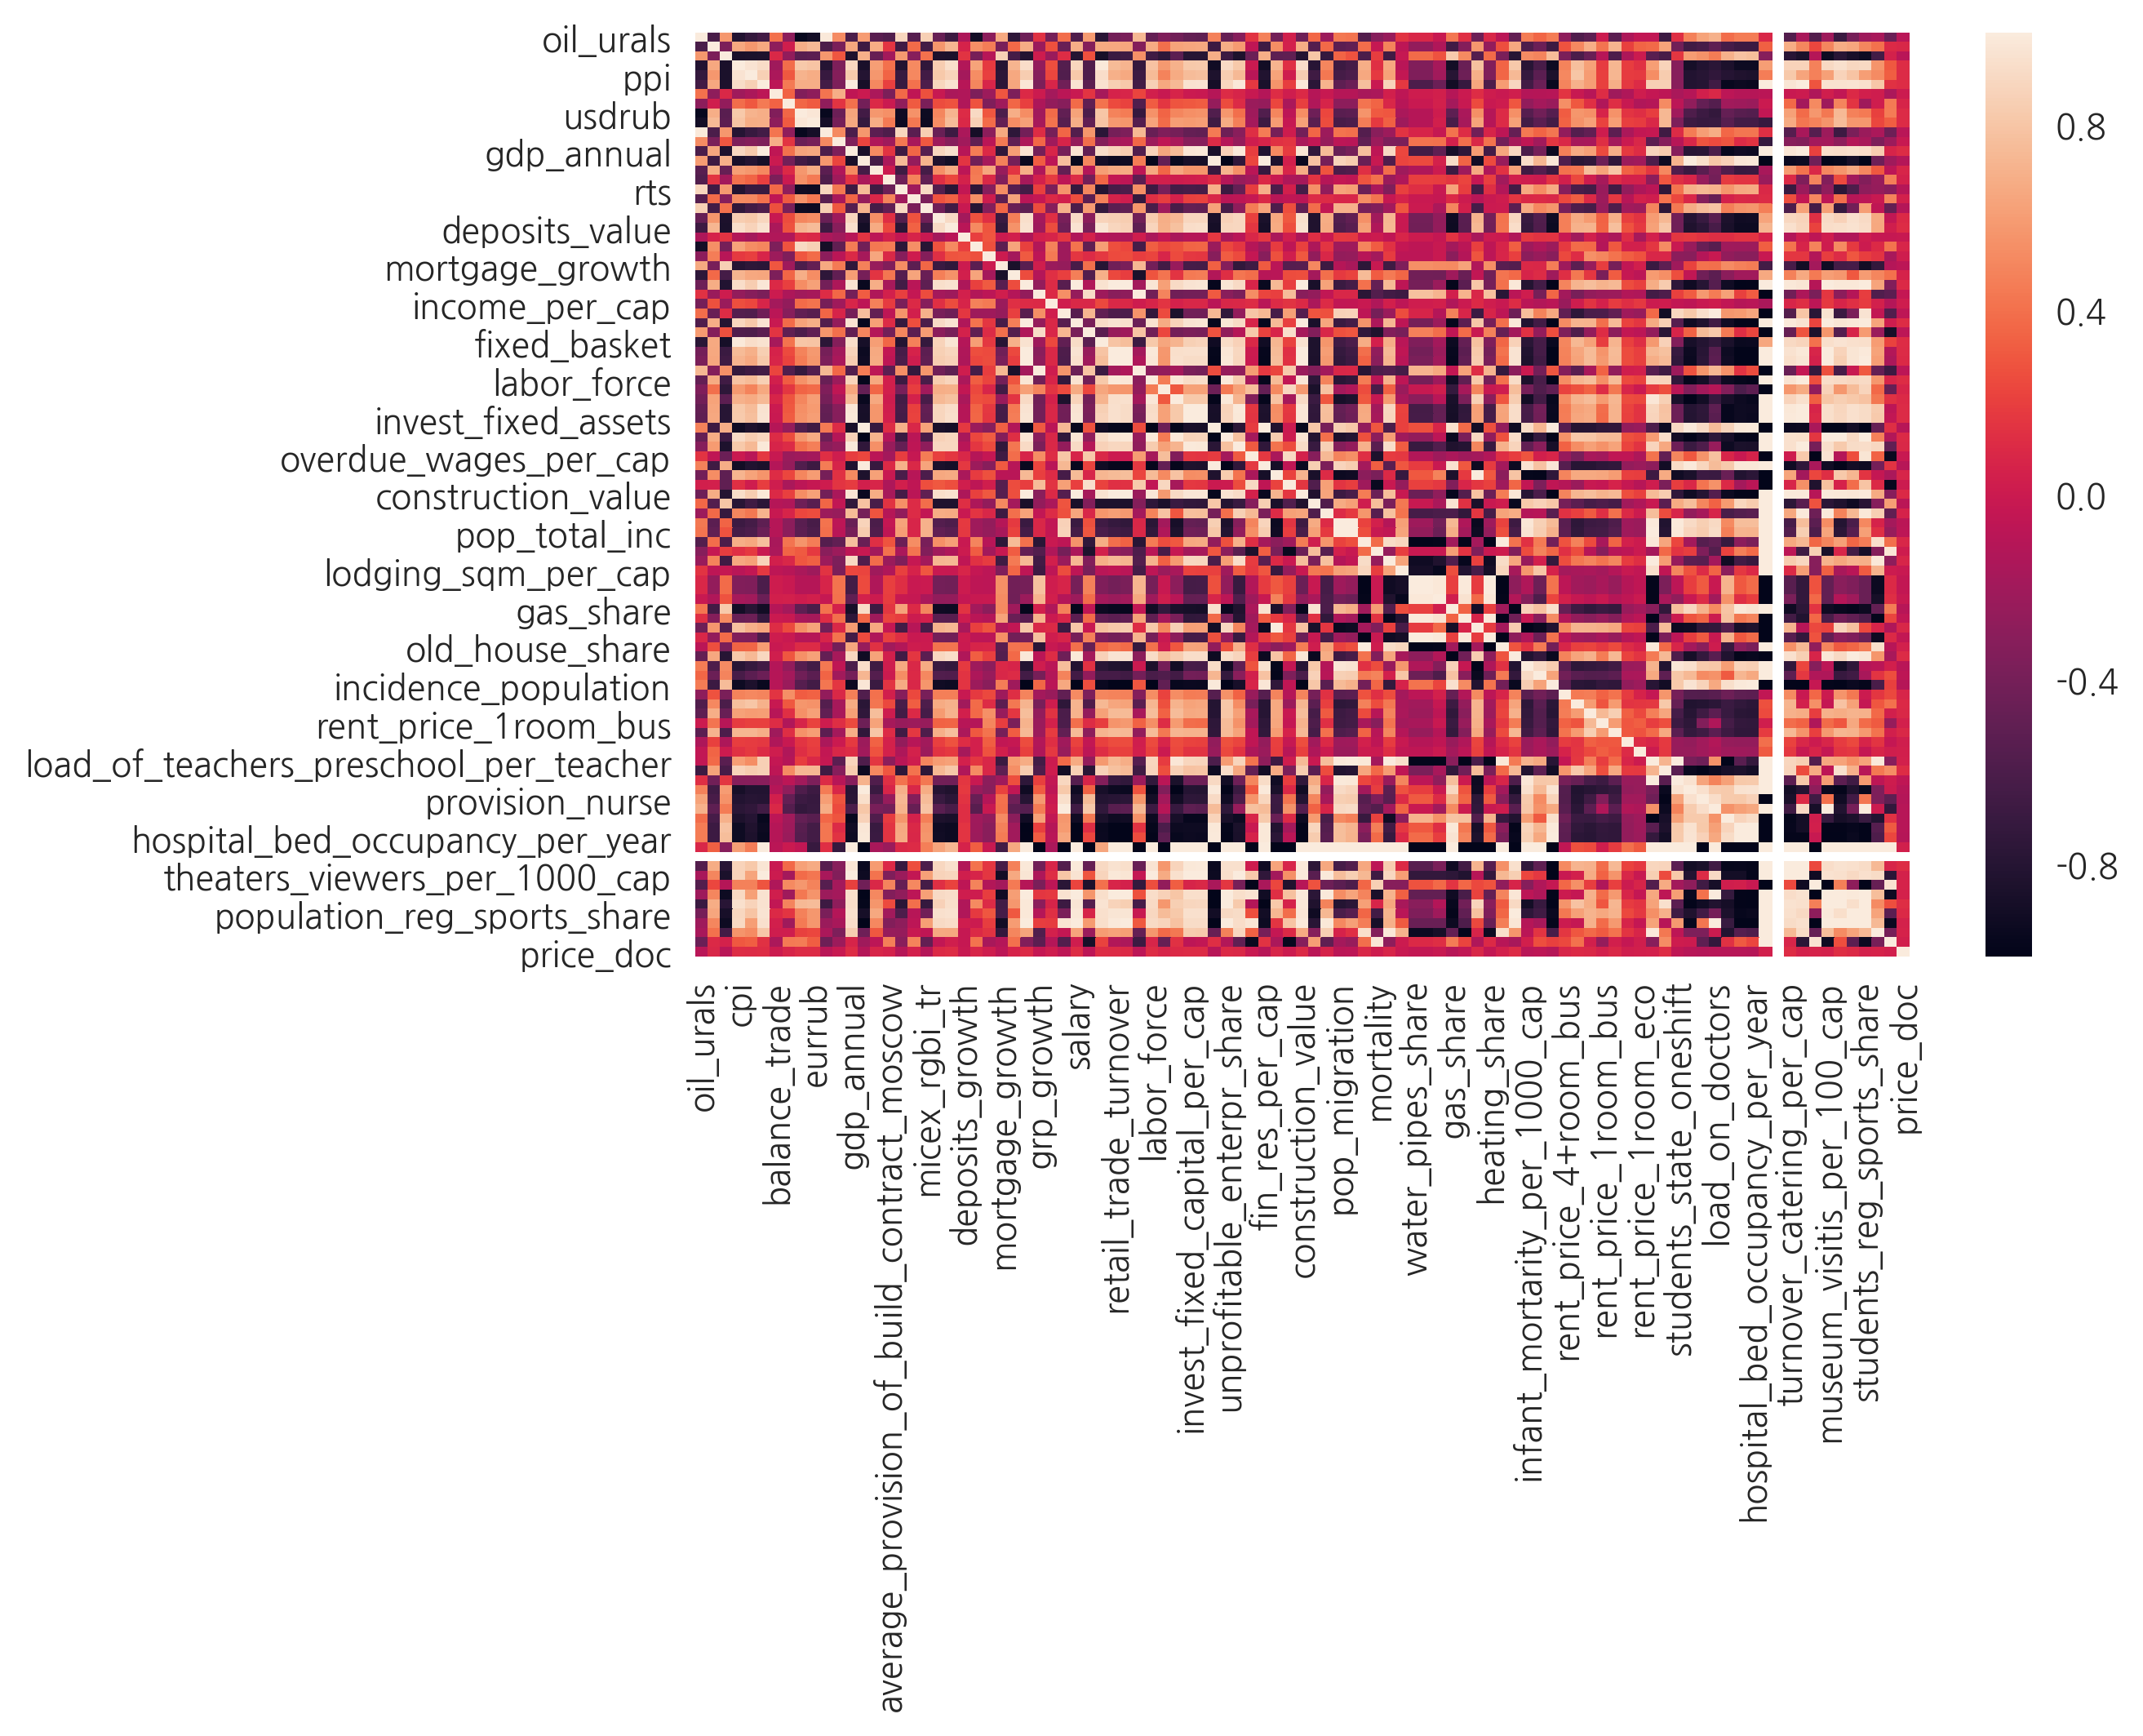

In [104]:
sns.heatmap(m_train_merge.corr())
plt.show()

# Fill high null value columns
provision_retail_space_modern_sqm             1754
provision_retail_space_sqm                    1753
old_education_build_share                     1389
modern_education_share                        1389
theaters_viewers_per_1000_cap                 1023
hospital_beds_available_per_cap               1023
hospital_bed_occupancy_per_year               1023
grp_growth                                    1023
museum_visitis_per_100_cap                    1023
population_reg_sports_share                   1023
students_reg_sports_share                     1023
load_of_teachers_preschool_per_teacher        1023
sewerage_share                                 658
gas_share                                      658
divorce_rate                                   658
baths_share                                    658
water_pipes_share                              658
lodging_sqm_per_cap                            658
housing_fund_sqm                               658
pop_total_inc                                  658
pop_migration                                  658
invest_fixed_assets_phys                       658
apartment_build                                658
apartment_fund_sqm                             658
marriages_per_1000_cap                         658
fin_res_per_cap                                658
overdue_wages_per_cap                          658
electric_stove_share                           658
share_own_revenues                             658
unprofitable_enterpr_share                     658
profitable_enterpr_share                       658
salary_growth                                  658
real_dispos_income_per_cap_growth              658
grp                                            658
hot_water_share                                658
construction_value                             658
heating_share                                  658
students_state_oneshift                        658
child_on_acc_pre_school                        658
power_clinics                                  658
old_house_share                                658
bandwidth_sports                               658
provision_doctors                              658
incidence_population                           658
perinatal_mort_per_1000_cap                    658
infant_mortarity_per_1000_cap                  658

### tar1 provision_retail_space_modern_sqm col

In [172]:
tar1_tr1_df = m_train_df_enc[['provision_retail_space_sqm']][m_train_df_enc['provision_retail_space_sqm'].isnull()]
# pro_re_sp_sq_null[['provision_retail_space_sqm']] = m_train_df_enc[['provision_retail_space_sqm']].mean()
# pro_re_sp_sq_null
tar1_tr1_df['provision_retail_space_sqm'] = m_train_df_enc[['provision_retail_space_sqm']].mean().values[0]
tar1_tr1_df

provision_retail_space_sqm
0                     767.536252
1                     767.536252
2                     767.536252
3                     767.536252
4                     767.536252
5                     767.536252
6                     767.536252
7                     767.536252
8                     767.536252
9                     767.536252
10                    767.536252
11                    767.536252
12                    767.536252
13                    767.536252
14                    767.536252
15                    767.536252
16                    767.536252
17                    767.536252
18                    767.536252
19                    767.536252
20                    767.536252
21                    767.536252
22                    767.536252
23                    767.536252
24                    767.536252
25                    767.536252
26                    767.536252
27                    767.536252
28                    767.536252
29                    767.536252
30                    767.536252
31                    767.536252
32                    767.536252
33                    767.536252
34                    767.536252
35                    767.536252
36                    767.536252
37                    767.536252
38                    767.536252
39                    767.536252
40                    767.536252
41                    767.536252
42                    767.536252
43                    767.536252
44                    767.536252
45                    767.536252
46                    767.536252
47                    767.536252
48                    767.536252
49                    767.536252
50                    767.536252
51                    767.536252
52                    767.536252
53                    767.536252
54                    767.536252
55                    767.536252
56                    767.536252
57                    767.536252
58                    767.536252
59                    767.536252
60                    767.536252
61                    767.536252
62                    767.536252
63                    767.536252
64                    767.536252
65                    767.536252
66                    767.536252
67                    767.536252
68                    767.536252
69                    767.536252
70                    767.536252
71                    767.536252
72                    767.536252
73                    767.536252
74                    767.536252
75                    767.536252
76                    767.536252
77                    767.536252
78                    767.536252
79                    767.536252
80                    767.536252
81                    767.536252
82                    767.536252
83                    767.536252
84                    767.536252
85                    767.536252
86                    767.536252
87                    767.536252
88                    767.536252
89                    767.536252
90                    767.536252
91                    767.536252
92                    767.536252
93                    767.536252
94                    767.536252
95                    767.536252
96                    767.536252
97                    767.536252
98                    767.536252
99                    767.536252
100                   767.536252
101                   767.536252
102                   767.536252
103                   767.536252
104                   767.536252
105                   767.536252
106                   767.536252
107                   767.536252
108                   767.536252
109                   767.536252
110                   767.536252
111                   767.536252
112                   767.536252
113                   767.536252
114                   767.536252
115                   767.536252
116                   767.536252
117                   767.536252
118                   767.536252
119                   767.536252
120          

In [174]:
tar1_tr1_finished_df = tar1_tr1_df.combine_first(m_train_df_enc)
print(tar1_tr1_finished_df['provision_retail_space_sqm'])
tar1_finished_df = tar1_tr1_finished_df

0       767.536252
1       767.536252
2       767.536252
3       767.536252
4       767.536252
5       767.536252
6       767.536252
7       767.536252
8       767.536252
9       767.536252
10      767.536252
11      767.536252
12      767.536252
13      767.536252
14      767.536252
15      767.536252
16      767.536252
17      767.536252
18      767.536252
19      767.536252
20      767.536252
21      767.536252
22      767.536252
23      767.536252
24      767.536252
25      767.536252
26      767.536252
27      767.536252
28      767.536252
29      767.536252
30      767.536252
31      767.536252
32      767.536252
33      767.536252
34      767.536252
35      767.536252
36      767.536252
37      767.536252
38      767.536252
39      767.536252
40      767.536252
41      767.536252
42      767.536252
43      767.536252
44      767.536252
45      767.536252
46      767.536252
47      767.536252
48      767.536252
49      767.536252
50      767.536252
51      767.536252
52      767.

###  tar2 provision_retail_space_sqm col

In [175]:
tar2_tr1_df = tar1_finished_df[['provision_retail_space_modern_sqm']][tar1_finished_df['provision_retail_space_modern_sqm'].values == 271.0]
tar2_tr1_df

provision_retail_space_modern_sqm
365                              271.0
366                              271.0
367                              271.0
368                              271.0
369                              271.0
370                              271.0
371                              271.0
372                              271.0
373                              271.0
374                              271.0
375                              271.0
376                              271.0
377                              271.0
378                              271.0
379                              271.0
380                              271.0
381                              271.0
382                              271.0
383                              271.0
384                              271.0
385                              271.0
386                              271.0
387                              271.0
388                              271.0
389                              271.0
390                              271.0
391                              271.0
392                              271.0
393                              271.0
394                              271.0
395                              271.0
396                              271.0
397                              271.0
398                              271.0
399                              271.0
400                              271.0
401                              271.0
402                              271.0
403                              271.0
404                              271.0
405                              271.0
406                              271.0
407                              271.0
408                              271.0
409                              271.0
410                              271.0
411                              271.0
412                              271.0
413                              271.0
414                              271.0
415                              271.0
416                              271.0
417                              271.0
418                              271.0
419                              271.0
420                              271.0
421                              271.0
422                              271.0
423                              271.0
424                              271.0
425                              271.0
426                              271.0
427                              271.0
428                              271.0
429                              271.0
430                              271.0
431                              271.0
432                              271.0
433                              271.0
434                              271.0
435                              271.0
436                              271.0
437                              271.0
438                              271.0
439                              271.0
440                              271.0
441                              271.0
442                              271.0
443                              271.0
444                              271.0
445                              271.0
446                              271.0
447                              271.0
448                              271.0
449                              271.0
450                              271.0
451                              271.0
452                              271.0
453                              271.0
454                              271.0
455                              271.0
456                              271.0
457                              271.0
458                              271.0
459                              271.0
460                              271.0
461                              271.0
462                              271.0
463                              271.0
464                              271.0
465                              271.0
466                        

In [176]:
tar2_tr1_df['provision_retail_space_modern_sqm'] = 721.0
tar2_tr1_finished_df = tar2_tr1_df.combine_first(tar1_finished_df)
tar2_tr1_finished_df['provision_retail_space_modern_sqm'].isnull()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [177]:
tar2_tr2_df = tar2_tr1_finished_df[['provision_retail_space_modern_sqm']][tar2_tr1_finished_df['provision_retail_space_modern_sqm'].isnull()]
tar2_tr2_df

provision_retail_space_modern_sqm
730                                 NaN
731                                 NaN
732                                 NaN
733                                 NaN
734                                 NaN
735                                 NaN
736                                 NaN
737                                 NaN
738                                 NaN
739                                 NaN
740                                 NaN
741                                 NaN
742                                 NaN
743                                 NaN
744                                 NaN
745                                 NaN
746                                 NaN
747                                 NaN
748                                 NaN
749                                 NaN
750                                 NaN
751                                 NaN
752                                 NaN
753                                 NaN
754                                 NaN
755                                 NaN
756                                 NaN
757                                 NaN
758                                 NaN
759                                 NaN
760                                 NaN
761                                 NaN
762                                 NaN
763                                 NaN
764                                 NaN
765                                 NaN
766                                 NaN
767                                 NaN
768                                 NaN
769                                 NaN
770                                 NaN
771                                 NaN
772                                 NaN
773                                 NaN
774                                 NaN
775                                 NaN
776                                 NaN
777                                 NaN
778                                 NaN
779                                 NaN
780                                 NaN
781                                 NaN
782                                 NaN
783                                 NaN
784                                 NaN
785                                 NaN
786                                 NaN
787                                 NaN
788                                 NaN
789                                 NaN
790                                 NaN
791                                 NaN
792                                 NaN
793                                 NaN
794                                 NaN
795                                 NaN
796                                 NaN
797                                 NaN
798                                 NaN
799                                 NaN
800                                 NaN
801                                 NaN
802                                 NaN
803                                 NaN
804                                 NaN
805                                 NaN
806                                 NaN
807                                 NaN
808                                 NaN
809                                 NaN
810                                 NaN
811                                 NaN
812                                 NaN
813                                 NaN
814                                 NaN
815                                 NaN
816                                 NaN
817                                 NaN
818                                 NaN
819                                 NaN
820                                 NaN
821                                 NaN
822                                 NaN
823                                 NaN
824                                 NaN
825                                 NaN
826                                 NaN
827                                 NaN
828                                 NaN
829   

In [178]:
tar2_tr2_df['provision_retail_space_modern_sqm'] = tar2_tr1_finished_df[['provision_retail_space_modern_sqm']].mean().values[0]
tar2_tr2_df

provision_retail_space_modern_sqm
730                               705.5
731                               705.5
732                               705.5
733                               705.5
734                               705.5
735                               705.5
736                               705.5
737                               705.5
738                               705.5
739                               705.5
740                               705.5
741                               705.5
742                               705.5
743                               705.5
744                               705.5
745                               705.5
746                               705.5
747                               705.5
748                               705.5
749                               705.5
750                               705.5
751                               705.5
752                               705.5
753                               705.5
754                               705.5
755                               705.5
756                               705.5
757                               705.5
758                               705.5
759                               705.5
760                               705.5
761                               705.5
762                               705.5
763                               705.5
764                               705.5
765                               705.5
766                               705.5
767                               705.5
768                               705.5
769                               705.5
770                               705.5
771                               705.5
772                               705.5
773                               705.5
774                               705.5
775                               705.5
776                               705.5
777                               705.5
778                               705.5
779                               705.5
780                               705.5
781                               705.5
782                               705.5
783                               705.5
784                               705.5
785                               705.5
786                               705.5
787                               705.5
788                               705.5
789                               705.5
790                               705.5
791                               705.5
792                               705.5
793                               705.5
794                               705.5
795                               705.5
796                               705.5
797                               705.5
798                               705.5
799                               705.5
800                               705.5
801                               705.5
802                               705.5
803                               705.5
804                               705.5
805                               705.5
806                               705.5
807                               705.5
808                               705.5
809                               705.5
810                               705.5
811                               705.5
812                               705.5
813                               705.5
814                               705.5
815                               705.5
816                               705.5
817                               705.5
818                               705.5
819                               705.5
820                               705.5
821                               705.5
822                               705.5
823                               705.5
824                               705.5
825                               705.5
826                               705.5
827                               705.5
828                               705.5
829   

In [179]:
tar2_finished_df = tar2_tr2_df.combine_first(tar2_tr1_finished_df)
print(tar2_finished_df.shape)
tar2_finished_df['provision_retail_space_modern_sqm']

(2484, 100)


0       690.0
1       690.0
2       690.0
3       690.0
4       690.0
5       690.0
6       690.0
7       690.0
8       690.0
9       690.0
10      690.0
11      690.0
12      690.0
13      690.0
14      690.0
15      690.0
16      690.0
17      690.0
18      690.0
19      690.0
20      690.0
21      690.0
22      690.0
23      690.0
24      690.0
25      690.0
26      690.0
27      690.0
28      690.0
29      690.0
30      690.0
31      690.0
32      690.0
33      690.0
34      690.0
35      690.0
36      690.0
37      690.0
38      690.0
39      690.0
40      690.0
41      690.0
42      690.0
43      690.0
44      690.0
45      690.0
46      690.0
47      690.0
48      690.0
49      690.0
50      690.0
51      690.0
52      690.0
53      690.0
54      690.0
55      690.0
56      690.0
57      690.0
58      690.0
59      690.0
60      690.0
61      690.0
62      690.0
63      690.0
64      690.0
65      690.0
66      690.0
67      690.0
68      690.0
69      690.0
70      690.0
71    

### tar3 old_education_build_share col

In [180]:
tar2_finished_df['old_education_build_share']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18      NaN
19      NaN
20      NaN
21      NaN
22      NaN
23      NaN
24      NaN
25      NaN
26      NaN
27      NaN
28      NaN
29      NaN
30      NaN
31      NaN
32      NaN
33      NaN
34      NaN
35      NaN
36      NaN
37      NaN
38      NaN
39      NaN
40      NaN
41      NaN
42      NaN
43      NaN
44      NaN
45      NaN
46      NaN
47      NaN
48      NaN
49      NaN
50      NaN
51      NaN
52      NaN
53      NaN
54      NaN
55      NaN
56      NaN
57      NaN
58      NaN
59      NaN
60      NaN
61      NaN
62      NaN
63      NaN
64      NaN
65      NaN
66      NaN
67      NaN
68      NaN
69      NaN
70      NaN
71      NaN
72      NaN
73      NaN
74      NaN
75      NaN
76      NaN
77      NaN
78      NaN
79      NaN
80      NaN
81      NaN
82      NaN
83  

In [183]:
tar3_tr1_df = tar2_finished_df[['old_education_build_share']][tar2_finished_df['old_education_build_share'].isnull()]
tar3_tr1_df

old_education_build_share
0                           NaN
1                           NaN
2                           NaN
3                           NaN
4                           NaN
5                           NaN
6                           NaN
7                           NaN
8                           NaN
9                           NaN
10                          NaN
11                          NaN
12                          NaN
13                          NaN
14                          NaN
15                          NaN
16                          NaN
17                          NaN
18                          NaN
19                          NaN
20                          NaN
21                          NaN
22                          NaN
23                          NaN
24                          NaN
25                          NaN
26                          NaN
27                          NaN
28                          NaN
29                          NaN
30                          NaN
31                          NaN
32                          NaN
33                          NaN
34                          NaN
35                          NaN
36                          NaN
37                          NaN
38                          NaN
39                          NaN
40                          NaN
41                          NaN
42                          NaN
43                          NaN
44                          NaN
45                          NaN
46                          NaN
47                          NaN
48                          NaN
49                          NaN
50                          NaN
51                          NaN
52                          NaN
53                          NaN
54                          NaN
55                          NaN
56                          NaN
57                          NaN
58                          NaN
59                          NaN
60                          NaN
61                          NaN
62                          NaN
63                          NaN
64                          NaN
65                          NaN
66                          NaN
67                          NaN
68                          NaN
69                          NaN
70                          NaN
71                          NaN
72                          NaN
73                          NaN
74                          NaN
75                          NaN
76                          NaN
77                          NaN
78                          NaN
79                          NaN
80                          NaN
81                          NaN
82                          NaN
83                          NaN
84                          NaN
85                          NaN
86                          NaN
87                          NaN
88                          NaN
89                          NaN
90                          NaN
91                          NaN
92                          NaN
93                          NaN
94                          NaN
95                          NaN
96                          NaN
97                          NaN
98                          NaN
99                          NaN
100                         NaN
101                         NaN
102                         NaN
103                         NaN
104                         NaN
105                         NaN
106                         NaN
107                         NaN
108                         NaN
109                         NaN
110                         NaN
111                         NaN
112                         NaN
113                         NaN
114                         NaN
115                         NaN
116                         NaN
117                         NaN
118                         NaN
119                         NaN
120                         NaN
121                         NaN
122                         NaN
123                         NaN
124   

In [184]:
tar3_tr1_df['old_education_build_share'] = tar2_finished_df[['old_education_build_share']].mean().values[0]
tar3_tr1_df

old_education_build_share
0                      1.333333
1                      1.333333
2                      1.333333
3                      1.333333
4                      1.333333
5                      1.333333
6                      1.333333
7                      1.333333
8                      1.333333
9                      1.333333
10                     1.333333
11                     1.333333
12                     1.333333
13                     1.333333
14                     1.333333
15                     1.333333
16                     1.333333
17                     1.333333
18                     1.333333
19                     1.333333
20                     1.333333
21                     1.333333
22                     1.333333
23                     1.333333
24                     1.333333
25                     1.333333
26                     1.333333
27                     1.333333
28                     1.333333
29                     1.333333
30                     1.333333
31                     1.333333
32                     1.333333
33                     1.333333
34                     1.333333
35                     1.333333
36                     1.333333
37                     1.333333
38                     1.333333
39                     1.333333
40                     1.333333
41                     1.333333
42                     1.333333
43                     1.333333
44                     1.333333
45                     1.333333
46                     1.333333
47                     1.333333
48                     1.333333
49                     1.333333
50                     1.333333
51                     1.333333
52                     1.333333
53                     1.333333
54                     1.333333
55                     1.333333
56                     1.333333
57                     1.333333
58                     1.333333
59                     1.333333
60                     1.333333
61                     1.333333
62                     1.333333
63                     1.333333
64                     1.333333
65                     1.333333
66                     1.333333
67                     1.333333
68                     1.333333
69                     1.333333
70                     1.333333
71                     1.333333
72                     1.333333
73                     1.333333
74                     1.333333
75                     1.333333
76                     1.333333
77                     1.333333
78                     1.333333
79                     1.333333
80                     1.333333
81                     1.333333
82                     1.333333
83                     1.333333
84                     1.333333
85                     1.333333
86                     1.333333
87                     1.333333
88                     1.333333
89                     1.333333
90                     1.333333
91                     1.333333
92                     1.333333
93                     1.333333
94                     1.333333
95                     1.333333
96                     1.333333
97                     1.333333
98                     1.333333
99                     1.333333
100                    1.333333
101                    1.333333
102                    1.333333
103                    1.333333
104                    1.333333
105                    1.333333
106                    1.333333
107                    1.333333
108                    1.333333
109                    1.333333
110                    1.333333
111                    1.333333
112                    1.333333
113                    1.333333
114                    1.333333
115                    1.333333
116                    1.333333
117                    1.333333
118                    1.333333
119                    1.333333
120                    1.333333
121                    1.333333
122                    1.333333
123                    1.333333
124   

In [191]:
tar3_finished_df = tar3_tr1_df.combine_first(tar2_finished_df)
print(tar3_finished_df.shape)
tar3_finished_df['old_education_build_share']

(2484, 100)


0       1.333333
1       1.333333
2       1.333333
3       1.333333
4       1.333333
5       1.333333
6       1.333333
7       1.333333
8       1.333333
9       1.333333
10      1.333333
11      1.333333
12      1.333333
13      1.333333
14      1.333333
15      1.333333
16      1.333333
17      1.333333
18      1.333333
19      1.333333
20      1.333333
21      1.333333
22      1.333333
23      1.333333
24      1.333333
25      1.333333
26      1.333333
27      1.333333
28      1.333333
29      1.333333
30      1.333333
31      1.333333
32      1.333333
33      1.333333
34      1.333333
35      1.333333
36      1.333333
37      1.333333
38      1.333333
39      1.333333
40      1.333333
41      1.333333
42      1.333333
43      1.333333
44      1.333333
45      1.333333
46      1.333333
47      1.333333
48      1.333333
49      1.333333
50      1.333333
51      1.333333
52      1.333333
53      1.333333
54      1.333333
55      1.333333
56      1.333333
57      1.333333
58      1.3333

### tar4 modern_education_share col

In [195]:
tar4_tr1_df = tar3_finished_df[['modern_education_share']][tar3_finished_df['modern_education_share'].isnull()]
tar4_tr1_df

modern_education_share
0                        NaN
1                        NaN
2                        NaN
3                        NaN
4                        NaN
5                        NaN
6                        NaN
7                        NaN
8                        NaN
9                        NaN
10                       NaN
11                       NaN
12                       NaN
13                       NaN
14                       NaN
15                       NaN
16                       NaN
17                       NaN
18                       NaN
19                       NaN
20                       NaN
21                       NaN
22                       NaN
23                       NaN
24                       NaN
25                       NaN
26                       NaN
27                       NaN
28                       NaN
29                       NaN
30                       NaN
31                       NaN
32                       NaN
33                       NaN
34                       NaN
35                       NaN
36                       NaN
37                       NaN
38                       NaN
39                       NaN
40                       NaN
41                       NaN
42                       NaN
43                       NaN
44                       NaN
45                       NaN
46                       NaN
47                       NaN
48                       NaN
49                       NaN
50                       NaN
51                       NaN
52                       NaN
53                       NaN
54                       NaN
55                       NaN
56                       NaN
57                       NaN
58                       NaN
59                       NaN
60                       NaN
61                       NaN
62                       NaN
63                       NaN
64                       NaN
65                       NaN
66                       NaN
67                       NaN
68                       NaN
69                       NaN
70                       NaN
71                       NaN
72                       NaN
73                       NaN
74                       NaN
75                       NaN
76                       NaN
77                       NaN
78                       NaN
79                       NaN
80                       NaN
81                       NaN
82                       NaN
83                       NaN
84                       NaN
85                       NaN
86                       NaN
87                       NaN
88                       NaN
89                       NaN
90                       NaN
91                       NaN
92                       NaN
93                       NaN
94                       NaN
95                       NaN
96                       NaN
97                       NaN
98                       NaN
99                       NaN
100                      NaN
101                      NaN
102                      NaN
103                      NaN
104                      NaN
105                      NaN
106                      NaN
107                      NaN
108                      NaN
109                      NaN
110                      NaN
111                      NaN
112                      NaN
113                      NaN
114                      NaN
115                      NaN
116                      NaN
117                      NaN
118                      NaN
119                      NaN
120                      NaN
121                      NaN
122                      NaN
123                      NaN
124                      NaN
125                      NaN
126                      NaN
127                      NaN
128                      NaN
129                      NaN
130                      NaN
131                      NaN
132                      NaN
133                      NaN
134                      NaN
135                      NaN
136                      NaN
137 

In [196]:
tar4_tr1_df['modern_education_share'] = tar3_finished_df[['modern_education_share']].mean().values[0]
tar4_tr1_df['modern_education_share']

0       1.333333
1       1.333333
2       1.333333
3       1.333333
4       1.333333
5       1.333333
6       1.333333
7       1.333333
8       1.333333
9       1.333333
10      1.333333
11      1.333333
12      1.333333
13      1.333333
14      1.333333
15      1.333333
16      1.333333
17      1.333333
18      1.333333
19      1.333333
20      1.333333
21      1.333333
22      1.333333
23      1.333333
24      1.333333
25      1.333333
26      1.333333
27      1.333333
28      1.333333
29      1.333333
30      1.333333
31      1.333333
32      1.333333
33      1.333333
34      1.333333
35      1.333333
36      1.333333
37      1.333333
38      1.333333
39      1.333333
40      1.333333
41      1.333333
42      1.333333
43      1.333333
44      1.333333
45      1.333333
46      1.333333
47      1.333333
48      1.333333
49      1.333333
50      1.333333
51      1.333333
52      1.333333
53      1.333333
54      1.333333
55      1.333333
56      1.333333
57      1.333333
58      1.3333

In [198]:
tar4_finished_df = tar4_tr1_df.combine_first(tar3_finished_df)
tar4_finished_df['modern_education_share']

0       1.333333
1       1.333333
2       1.333333
3       1.333333
4       1.333333
5       1.333333
6       1.333333
7       1.333333
8       1.333333
9       1.333333
10      1.333333
11      1.333333
12      1.333333
13      1.333333
14      1.333333
15      1.333333
16      1.333333
17      1.333333
18      1.333333
19      1.333333
20      1.333333
21      1.333333
22      1.333333
23      1.333333
24      1.333333
25      1.333333
26      1.333333
27      1.333333
28      1.333333
29      1.333333
30      1.333333
31      1.333333
32      1.333333
33      1.333333
34      1.333333
35      1.333333
36      1.333333
37      1.333333
38      1.333333
39      1.333333
40      1.333333
41      1.333333
42      1.333333
43      1.333333
44      1.333333
45      1.333333
46      1.333333
47      1.333333
48      1.333333
49      1.333333
50      1.333333
51      1.333333
52      1.333333
53      1.333333
54      1.333333
55      1.333333
56      1.333333
57      1.333333
58      1.3333

### tar5 theaters_viewers_per_1000_cap col

In [207]:
temp_tar5 = tar4_finished_df[['theaters_viewers_per_1000_cap', 'timestamp']]
temp_tar5['year'] = temp_tar5.timestamp.apply(lambda x : x[:4])
temp_tar5_group = temp_tar5.groupby('year').aggregate(np.mean)
temp_tar5_group

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


theaters_viewers_per_1000_cap
year                               
2010                          527.0
2011                          565.0
2012                          603.0
2013                          627.0
2014                            NaN
2015                            NaN
2016                            NaN

In [226]:
temp5_tar5_2014 = temp_tar5[['theaters_viewers_per_1000_cap']][temp_tar5['year'] == '2014']
temp5_tar5_2015 = temp_tar5[['theaters_viewers_per_1000_cap']][temp_tar5['year'] == '2015']
temp5_tar5_2016 = temp_tar5[['theaters_viewers_per_1000_cap']][temp_tar5['year'] == '2016']
temp5_tar5_2014['theaters_viewers_per_1000_cap'] = 627.0 + 25.0
temp5_tar5_2015['theaters_viewers_per_1000_cap'] = 627.0 + 25.0 + 25.0
temp5_tar5_2016['theaters_viewers_per_1000_cap'] = 627.0 + 25.0 + 25.0 + 25.0

In [229]:
tar5_tr1_finished_df = pd.concat([temp5_tar5_2014, temp5_tar5_2015, temp5_tar5_2016], axis=0)
print(tar5_tr1_finished_df.shape)
tar5_tr1_finished_df

(1023, 1)


theaters_viewers_per_1000_cap
1461                            652
1462                            652
1463                            652
1464                            652
1465                            652
1466                            652
1467                            652
1468                            652
1469                            652
1470                            652
1471                            652
1472                            652
1473                            652
1474                            652
1475                            652
1476                            652
1477                            652
1478                            652
1479                            652
1480                            652
1481                            652
1482                            652
1483                            652
1484                            652
1485                            652
1486                            652
1487                            652
1488                            652
1489                            652
1490                            652
1491                            652
1492                            652
1493                            652
1494                            652
1495                            652
1496                            652
1497                            652
1498                            652
1499                            652
1500                            652
1501                            652
1502                            652
1503                            652
1504                            652
1505                            652
1506                            652
1507                            652
1508                            652
1509                            652
1510                            652
1511                            652
1512                            652
1513                            652
1514                            652
1515                            652
1516                            652
1517                            652
1518                            652
1519                            652
1520                            652
1521                            652
1522                            652
1523                            652
1524                            652
1525                            652
1526                            652
1527                            652
1528                            652
1529                            652
1530                            652
1531                            652
1532                            652
1533                            652
1534                            652
1535                            652
1536                            652
1537                            652
1538                            652
1539                            652
1540                            652
1541                            652
1542                            652
1543                            652
1544                            652
1545                            652
1546                            652
1547                            652
1548                            652
1549                            652
1550                            652
1551                            652
1552                            652
1553                            652
1554                            652
1555                            652
1556                            652
1557                            652
1558                            652
1559                            652
1560                            652
1561                            652
1562                            652
1563                            652
1564                            652
1565                            652
1566                            652
1567                            652
1568                            652
1569                            652
1570                            652
1571      

In [231]:
tar5_finished_df = tar5_tr1_finished_df.combine_first(tar4_finished_df)
tar5_finished_df['theaters_viewers_per_1000_cap'].isnull().sum()

0

### tar6 hospital_beds_available_per_cap col

In [234]:
tar5_finished_df[['hospital_beds_available_per_cap', 'hospital_bed_occupancy_per_year', 'provision_doctors', 'provision_nurse']]

hospital_beds_available_per_cap  hospital_bed_occupancy_per_year  \
0                                 NaN                              NaN   
1                                 NaN                              NaN   
2                                 NaN                              NaN   
3                                 NaN                              NaN   
4                                 NaN                              NaN   
5                                 NaN                              NaN   
6                                 NaN                              NaN   
7                                 NaN                              NaN   
8                                 NaN                              NaN   
9                                 NaN                              NaN   
10                                NaN                              NaN   
11                                NaN                              NaN   
12                                NaN                              NaN   
13                                NaN                              NaN   
14                                NaN                              NaN   
15                                NaN                              NaN   
16                                NaN                              NaN   
17                                NaN                              NaN   
18                                NaN                              NaN   
19                                NaN                              NaN   
20                                NaN                              NaN   
21                                NaN                              NaN   
22                                NaN                              NaN   
23                                NaN                              NaN   
24                                NaN                              NaN   
25                                NaN                              NaN   
26                                NaN                              NaN   
27                                NaN                              NaN   
28                                NaN                              NaN   
29                                NaN                              NaN   
30                                NaN                              NaN   
31                                NaN                              NaN   
32                                NaN                              NaN   
33                                NaN                              NaN   
34                                NaN                              NaN   
35                                NaN                              NaN   
36                                NaN                              NaN   
37                                NaN                              NaN   
38                                NaN                              NaN   
39                                NaN                              NaN   
40                                NaN                              NaN   
41                                NaN                              NaN   
42                                NaN                              NaN   
43                                NaN                              NaN   
44                                NaN                              NaN   
45                                NaN                              NaN   
46                                NaN                              NaN   
47                                NaN                              NaN   
48                                NaN                              NaN   
49                                NaN                              NaN   
50                                NaN                              NaN   
51                                NaN                              NaN   
52                                NaN                              NaN   
53        

In [235]:
temp_tar6 = tar5_finished_df[['hospital_beds_available_per_cap', 'timestamp']]
temp_tar6['year'] = temp_tar6.timestamp.apply(lambda x : x[:4])
temp_tar6_group = temp_tar6.groupby('year').aggregate(np.mean)
temp_tar6_group

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hospital_beds_available_per_cap
year                                 
2010                              NaN
2011                            846.0
2012                            836.0
2013                            772.0
2014                            707.0
2015                              NaN
2016                              NaN

In [237]:
temp6_tar6_2010 = temp_tar6[['hospital_beds_available_per_cap']][temp_tar6['year'] == '2010']
temp6_tar6_2015 = temp_tar6[['hospital_beds_available_per_cap']][temp_tar6['year'] == '2015']
temp6_tar6_2016 = temp_tar6[['hospital_beds_available_per_cap']][temp_tar6['year'] == '2016']
temp6_tar6_2010['hospital_beds_available_per_cap'] = 846.0 + 10.0
temp6_tar6_2015['hospital_beds_available_per_cap'] = 707.0 - 10.0
temp6_tar6_2016['hospital_beds_available_per_cap'] = 707.0 - 10.0 - 10.0

In [238]:
tar6_tr1_finished_df = pd.concat([temp6_tar6_2010, temp6_tar6_2015, temp6_tar6_2016], axis=0)
print(tar6_tr1_finished_df.shape)
tar6_tr1_finished_df

(1023, 1)


hospital_beds_available_per_cap
0                               856.0
1                               856.0
2                               856.0
3                               856.0
4                               856.0
5                               856.0
6                               856.0
7                               856.0
8                               856.0
9                               856.0
10                              856.0
11                              856.0
12                              856.0
13                              856.0
14                              856.0
15                              856.0
16                              856.0
17                              856.0
18                              856.0
19                              856.0
20                              856.0
21                              856.0
22                              856.0
23                              856.0
24                              856.0
25                              856.0
26                              856.0
27                              856.0
28                              856.0
29                              856.0
30                              856.0
31                              856.0
32                              856.0
33                              856.0
34                              856.0
35                              856.0
36                              856.0
37                              856.0
38                              856.0
39                              856.0
40                              856.0
41                              856.0
42                              856.0
43                              856.0
44                              856.0
45                              856.0
46                              856.0
47                              856.0
48                              856.0
49                              856.0
50                              856.0
51                              856.0
52                              856.0
53                              856.0
54                              856.0
55                              856.0
56                              856.0
57                              856.0
58                              856.0
59                              856.0
60                              856.0
61                              856.0
62                              856.0
63                              856.0
64                              856.0
65                              856.0
66                              856.0
67                              856.0
68                              856.0
69                              856.0
70                              856.0
71                              856.0
72                              856.0
73                              856.0
74                              856.0
75                              856.0
76                              856.0
77                              856.0
78                              856.0
79                              856.0
80                              856.0
81                              856.0
82                              856.0
83                              856.0
84                              856.0
85                              856.0
86                              856.0
87                              856.0
88                              856.0
89                              856.0
90                              856.0
91                              856.0
92                              856.0
93                              856.0
94                              856.0
95                              856.0
96                              856.0
97                              856.0
98                              856.0
99                              856.0
100                             856.0
101                             856.0
102                             856.0
103                             856.0
104             

In [239]:
tar6_finished_df = tar6_tr1_finished_df.combine_first(tar5_finished_df)
tar6_finished_df['hospital_beds_available_per_cap'].isnull().sum()

0

### tar7 

In [1]:
# tar6_finished_df.to_csv('m_train_treated_tar7_20171022.csv', index=False)
tar6_finished_df = pd.read_csv('m_train_treated_tar7_20171022.csv')

In [3]:
tar6_finished_df.isnull().sum().sort_values(ascending=False)

hospital_bed_occupancy_per_year           1023
students_reg_sports_share                 1023
museum_visitis_per_100_cap                1023
load_of_teachers_preschool_per_teacher    1023
grp_growth                                1023
population_reg_sports_share               1023
construction_value                         658
infant_mortarity_per_1000_cap              658
pop_total_inc                              658
pop_migration                              658
perinatal_mort_per_1000_cap                658
overdue_wages_per_cap                      658
old_house_share                            658
apartment_fund_sqm                         658
marriages_per_1000_cap                     658
lodging_sqm_per_cap                        658
bandwidth_sports                           658
invest_fixed_assets_phys                   658
incidence_population                       658
divorce_rate                               658
housing_fund_sqm                           658
hot_water_sha

In [4]:
tar6_finished_df[['hospital_bed_occupancy_per_year']]

hospital_bed_occupancy_per_year
0                                 NaN
1                                 NaN
2                                 NaN
3                                 NaN
4                                 NaN
5                                 NaN
6                                 NaN
7                                 NaN
8                                 NaN
9                                 NaN
10                                NaN
11                                NaN
12                                NaN
13                                NaN
14                                NaN
15                                NaN
16                                NaN
17                                NaN
18                                NaN
19                                NaN
20                                NaN
21                                NaN
22                                NaN
23                                NaN
24                                NaN
25                                NaN
26                                NaN
27                                NaN
28                                NaN
29                                NaN
...                               ...
2454                              NaN
2455                              NaN
2456                              NaN
2457                              NaN
2458                              NaN
2459                              NaN
2460                              NaN
2461                              NaN
2462                              NaN
2463                              NaN
2464                              NaN
2465                              NaN
2466                              NaN
2467                              NaN
2468                              NaN
2469                              NaN
2470                              NaN
2471                              NaN
2472                              NaN
2473                              NaN
2474                              NaN
2475                              NaN
2476                              NaN
2477                              NaN
2478                              NaN
2479                              NaN
2480                              NaN
2481                              NaN
2482                              NaN
2483                              NaN

[2484 rows x 1 columns]

In [5]:
tar7_tr1_df = tar6_finished_df[['hospital_bed_occupancy_per_year']][tar6_finished_df.loc[:, 'hospital_bed_occupancy_per_year'].isnull()]
tar7_tr1_df.isnull().sum()

hospital_bed_occupancy_per_year    1023
dtype: int64

In [6]:
tar7_tr1_df[['hospital_bed_occupancy_per_year']] = tar6_finished_df['hospital_bed_occupancy_per_year'].mean()
tar7_tr1_df 

hospital_bed_occupancy_per_year
0                          294.752225
1                          294.752225
2                          294.752225
3                          294.752225
4                          294.752225
5                          294.752225
6                          294.752225
7                          294.752225
8                          294.752225
9                          294.752225
10                         294.752225
11                         294.752225
12                         294.752225
13                         294.752225
14                         294.752225
15                         294.752225
16                         294.752225
17                         294.752225
18                         294.752225
19                         294.752225
20                         294.752225
21                         294.752225
22                         294.752225
23                         294.752225
24                         294.752225
25                         294.752225
26                         294.752225
27                         294.752225
28                         294.752225
29                         294.752225
...                               ...
2454                       294.752225
2455                       294.752225
2456                       294.752225
2457                       294.752225
2458                       294.752225
2459                       294.752225
2460                       294.752225
2461                       294.752225
2462                       294.752225
2463                       294.752225
2464                       294.752225
2465                       294.752225
2466                       294.752225
2467                       294.752225
2468                       294.752225
2469                       294.752225
2470                       294.752225
2471                       294.752225
2472                       294.752225
2473                       294.752225
2474                       294.752225
2475                       294.752225
2476                       294.752225
2477                       294.752225
2478                       294.752225
2479                       294.752225
2480                       294.752225
2481                       294.752225
2482                       294.752225
2483                       294.752225

[1023 rows x 1 columns]

In [7]:
tar7_finished_df = tar7_tr1_df.combine_first(tar6_finished_df)
tar7_finished_df[['hospital_bed_occupancy_per_year']]

hospital_bed_occupancy_per_year
0                          294.752225
1                          294.752225
2                          294.752225
3                          294.752225
4                          294.752225
5                          294.752225
6                          294.752225
7                          294.752225
8                          294.752225
9                          294.752225
10                         294.752225
11                         294.752225
12                         294.752225
13                         294.752225
14                         294.752225
15                         294.752225
16                         294.752225
17                         294.752225
18                         294.752225
19                         294.752225
20                         294.752225
21                         294.752225
22                         294.752225
23                         294.752225
24                         294.752225
25                         294.752225
26                         294.752225
27                         294.752225
28                         294.752225
29                         294.752225
...                               ...
2454                       294.752225
2455                       294.752225
2456                       294.752225
2457                       294.752225
2458                       294.752225
2459                       294.752225
2460                       294.752225
2461                       294.752225
2462                       294.752225
2463                       294.752225
2464                       294.752225
2465                       294.752225
2466                       294.752225
2467                       294.752225
2468                       294.752225
2469                       294.752225
2470                       294.752225
2471                       294.752225
2472                       294.752225
2473                       294.752225
2474                       294.752225
2475                       294.752225
2476                       294.752225
2477                       294.752225
2478                       294.752225
2479                       294.752225
2480                       294.752225
2481                       294.752225
2482                       294.752225
2483                       294.752225

[2484 rows x 1 columns]

### tar8 students_reg_sports_share
students_reg_sports_share                     1023
museum_visitis_per_100_cap                    1023
load_of_teachers_preschool_per_teacher        1023
grp_growth                                    1023
population_reg_sports_share                   1023
construction_value                             658
infant_mortarity_per_1000_cap                  658
pop_total_inc                                  658
pop_migration                                  658
perinatal_mort_per_1000_cap                    658
overdue_wages_per_cap                          658
old_house_share                                658
apartment_fund_sqm                             658
marriages_per_1000_cap                         658
lodging_sqm_per_cap                            658
bandwidth_sports                               658
invest_fixed_assets_phys                       658
incidence_population                           658
divorce_rate                                   658
housing_fund_sqm                               658
hot_water_share                                658
power_clinics                                  658
heating_share                                  658
baths_share                                    658
grp                                            658
gas_share                                      658
fin_res_per_cap                                658
electric_stove_share                           658
child_on_acc_pre_school                        658
water_pipes_share                              658
apartment_build                                658
provision_doctors                              658
salary_growth                                  658
unprofitable_enterpr_share                     658
real_dispos_income_per_cap_growth              658
students_state_oneshift                        658
sewerage_share                                 658
profitable_enterpr_share                       658
share_own_revenues                             658
deposits_rate                                  414
net_capital_export                             396

In [8]:
tar8_tr1_df = tar7_finished_df[['students_reg_sports_share', 'timestamp']]
tar8_tr1_df.loc[:, 'year'] = tar8_tr1_df.loc[:,'timestamp'].apply(lambda x : x[:4])
tar8_tr1_df

/home/dockeruser/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/dockeruser/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


students_reg_sports_share   timestamp  year
0                         63.03  2010-01-01  2010
1                         63.03  2010-01-02  2010
2                         63.03  2010-01-03  2010
3                         63.03  2010-01-04  2010
4                         63.03  2010-01-05  2010
5                         63.03  2010-01-06  2010
6                         63.03  2010-01-07  2010
7                         63.03  2010-01-08  2010
8                         63.03  2010-01-09  2010
9                         63.03  2010-01-10  2010
10                        63.03  2010-01-11  2010
11                        63.03  2010-01-12  2010
12                        63.03  2010-01-13  2010
13                        63.03  2010-01-14  2010
14                        63.03  2010-01-15  2010
15                        63.03  2010-01-16  2010
16                        63.03  2010-01-17  2010
17                        63.03  2010-01-18  2010
18                        63.03  2010-01-19  2010
19                        63.03  2010-01-20  2010
20                        63.03  2010-01-21  2010
21                        63.03  2010-01-22  2010
22                        63.03  2010-01-23  2010
23                        63.03  2010-01-24  2010
24                        63.03  2010-01-25  2010
25                        63.03  2010-01-26  2010
26                        63.03  2010-01-27  2010
27                        63.03  2010-01-28  2010
28                        63.03  2010-01-29  2010
29                        63.03  2010-01-30  2010
...                         ...         ...   ...
2454                        NaN  2016-09-20  2016
2455                        NaN  2016-09-21  2016
2456                        NaN  2016-09-22  2016
2457                        NaN  2016-09-23  2016
2458                        NaN  2016-09-24  2016
2459                        NaN  2016-09-25  2016
2460                        NaN  2016-09-26  2016
2461                        NaN  2016-09-27  2016
2462                        NaN  2016-09-28  2016
2463                        NaN  2016-09-29  2016
2464                        NaN  2016-09-30  2016
2465                        NaN  2016-10-01  2016
2466                        NaN  2016-10-02  2016
2467                        NaN  2016-10-03  2016
2468                        NaN  2016-10-04  2016
2469                        NaN  2016-10-05  2016
2470                        NaN  2016-10-06  2016
2471                        NaN  2016-10-07  2016
2472                        NaN  2016-10-08  2016
2473                        NaN  2016-10-09  2016
2474                        NaN  2016-10-10  2016
2475                        NaN  2016-10-11  2016
2476                        NaN  2016-10-12  2016
2477                        NaN  2016-10-13  2016
2478                        NaN  2016-10-14  2016
2479                        NaN  2016-10-15  2016
2480                        NaN  2016-10-16  2016
2481                        NaN  2016-10-17  2016
2482                        NaN  2016-10-18  2016
2483                        NaN  2016-10-19  2016

[2484 rows x 3 columns]

In [9]:
tar8_tr1_df[['students_reg_sports_share', 'year']].groupby('year').aggregate(np.mean)

students_reg_sports_share
year                           
2010                      63.03
2011                      64.12
2012                      67.85
2013                      76.20
2014                        NaN
2015                        NaN
2016                        NaN

In [10]:
tar8_tr1_df[['students_reg_sports_share', 'year']][tar8_tr1_df.loc[:, 'year'] == '2014'] = 80

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/dockeruser/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [11]:
tar8_tr1_df.loc[tar8_tr1_df['year'] == '2014', 'students_reg_sports_share'] = 80
tar8_tr1_df.loc[tar8_tr1_df['year'] == '2015', 'students_reg_sports_share'] = 84
tar8_tr1_df.loc[tar8_tr1_df['year'] == '2016', 'students_reg_sports_share'] = 88

/home/dockeruser/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [12]:
tar8_finished_df = tar8_tr1_df.combine_first(tar7_finished_df)
print(tar8_finished_df.shape)
tar8_finished_df

(2484, 101)


apartment_build  apartment_fund_sqm  average_life_exp  \
0             22825.0                 NaN              74.2   
1             22825.0                 NaN              74.2   
2             22825.0                 NaN              74.2   
3             22825.0                 NaN              74.2   
4             22825.0                 NaN              74.2   
5             22825.0                 NaN              74.2   
6             22825.0                 NaN              74.2   
7             22825.0                 NaN              74.2   
8             22825.0                 NaN              74.2   
9             22825.0                 NaN              74.2   
10            22825.0                 NaN              74.2   
11            22825.0                 NaN              74.2   
12            22825.0                 NaN              74.2   
13            22825.0                 NaN              74.2   
14            22825.0                 NaN              74.2   
15            22825.0                 NaN              74.2   
16            22825.0                 NaN              74.2   
17            22825.0                 NaN              74.2   
18            22825.0                 NaN              74.2   
19            22825.0                 NaN              74.2   
20            22825.0                 NaN              74.2   
21            22825.0                 NaN              74.2   
22            22825.0                 NaN              74.2   
23            22825.0                 NaN              74.2   
24            22825.0                 NaN              74.2   
25            22825.0                 NaN              74.2   
26            22825.0                 NaN              74.2   
27            22825.0                 NaN              74.2   
28            22825.0                 NaN              74.2   
29            22825.0                 NaN              74.2   
...               ...                 ...               ...   
2454              NaN                 NaN               NaN   
2455              NaN                 NaN               NaN   
2456              NaN                 NaN               NaN   
2457              NaN                 NaN               NaN   
2458              NaN                 NaN               NaN   
2459              NaN                 NaN               NaN   
2460              NaN                 NaN               NaN   
2461              NaN                 NaN               NaN   
2462              NaN                 NaN               NaN   
2463              NaN                 NaN               NaN   
2464              NaN                 NaN               NaN   
2465              NaN                 NaN               NaN   
2466              NaN                 NaN               NaN   
2467              NaN                 NaN               NaN   
2468              NaN                 NaN               NaN   
2469              NaN                 NaN               NaN   
2470              NaN                 NaN               NaN   
2471              NaN                 NaN               NaN   
2472              NaN                 NaN               NaN   
2473              NaN                 NaN               NaN   
2474              NaN                 NaN               NaN   
2475              NaN                 NaN               NaN   
2476              NaN                 NaN               NaN   
2477              NaN                 NaN               NaN   
2478              NaN                 NaN               NaN   
2479              NaN                 NaN               NaN   
2480              NaN                 NaN               NaN   
2481              NaN                 NaN               NaN   
2482              NaN                 NaN               NaN   
2483              NaN                 NaN               NaN   

      average_provision_of_build_contract  \
0                                    5.00   
1        

### tar9 museum_visitis_per_100_cap

In [13]:
tar9_tr1_df = tar8_finished_df[['museum_visitis_per_100_cap', 'year']]
tar9_temp_df = tar9_tr1_df[['museum_visitis_per_100_cap', 'year']].groupby('year').aggregate(np.mean)
tar9_temp_df 

museum_visitis_per_100_cap
year                            
2010                       993.0
2011                      1240.0
2012                      1309.0
2013                      1440.0
2014                         NaN
2015                         NaN
2016                         NaN

In [14]:
tar9_temp_df['pencent_change'] = tar9_temp_df.pct_change(periods=1)
tar9_temp_df

museum_visitis_per_100_cap  pencent_change
year                                            
2010                       993.0             NaN
2011                      1240.0        0.248741
2012                      1309.0        0.055645
2013                      1440.0        0.100076
2014                         NaN             NaN
2015                         NaN             NaN
2016                         NaN             NaN

In [15]:
tar9_tr1_df.loc[tar9_tr1_df['museum_visitis_per_100_cap'].isnull(), 'museum_visitis_per_100_cap'] = tar9_tr1_df['museum_visitis_per_100_cap'].mean()
tar9_tr1_df['museum_visitis_per_100_cap']

/home/dockeruser/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


0        993.000000
1        993.000000
2        993.000000
3        993.000000
4        993.000000
5        993.000000
6        993.000000
7        993.000000
8        993.000000
9        993.000000
10       993.000000
11       993.000000
12       993.000000
13       993.000000
14       993.000000
15       993.000000
16       993.000000
17       993.000000
18       993.000000
19       993.000000
20       993.000000
21       993.000000
22       993.000000
23       993.000000
24       993.000000
25       993.000000
26       993.000000
27       993.000000
28       993.000000
29       993.000000
           ...     
2454    1245.543463
2455    1245.543463
2456    1245.543463
2457    1245.543463
2458    1245.543463
2459    1245.543463
2460    1245.543463
2461    1245.543463
2462    1245.543463
2463    1245.543463
2464    1245.543463
2465    1245.543463
2466    1245.543463
2467    1245.543463
2468    1245.543463
2469    1245.543463
2470    1245.543463
2471    1245.543463
2472    1245.543463


In [16]:
tar9_finished_df = tar9_tr1_df.combine_first(tar8_finished_df)
print(tar9_finished_df.shape)
tar9_finished_df[['museum_visitis_per_100_cap']].isnull().sum()

(2484, 101)


museum_visitis_per_100_cap    0
dtype: int64

### tar10 load_of_teachers_preschool_per_teacher 

In [17]:
tar9_finished_df[['load_of_teachers_preschool_per_teacher']]

load_of_teachers_preschool_per_teacher
0                                 721.477765
1                                 721.477765
2                                 721.477765
3                                 721.477765
4                                 721.477765
5                                 721.477765
6                                 721.477765
7                                 721.477765
8                                 721.477765
9                                 721.477765
10                                721.477765
11                                721.477765
12                                721.477765
13                                721.477765
14                                721.477765
15                                721.477765
16                                721.477765
17                                721.477765
18                                721.477765
19                                721.477765
20                                721.477765
21                                721.477765
22                                721.477765
23                                721.477765
24                                721.477765
25                                721.477765
26                                721.477765
27                                721.477765
28                                721.477765
29                                721.477765
...                                      ...
2454                                     NaN
2455                                     NaN
2456                                     NaN
2457                                     NaN
2458                                     NaN
2459                                     NaN
2460                                     NaN
2461                                     NaN
2462                                     NaN
2463                                     NaN
2464                                     NaN
2465                                     NaN
2466                                     NaN
2467                                     NaN
2468                                     NaN
2469                                     NaN
2470                                     NaN
2471                                     NaN
2472                                     NaN
2473                                     NaN
2474                                     NaN
2475                                     NaN
2476                                     NaN
2477                                     NaN
2478                                     NaN
2479                                     NaN
2480                                     NaN
2481                                     NaN
2482                                     NaN
2483                                     NaN

[2484 rows x 1 columns]

In [18]:
tar9_finished_df[['load_of_teachers_preschool_per_teacher', 'year']].groupby('year').aggregate(np.mean)

load_of_teachers_preschool_per_teacher
year                                        
2010                              721.477765
2011                              793.319561
2012                              856.730547
2013                              863.394794
2014                                     NaN
2015                                     NaN
2016                                     NaN

In [19]:
tar9_finished_df.loc[tar9_finished_df['year'].apply(lambda x : x in ['2014', '2015', '2016']), 'load_of_teachers_preschool_per_teacher'] = \
    tar9_finished_df['load_of_teachers_preschool_per_teacher'].mean()
tar9_finished_df[['load_of_teachers_preschool_per_teacher']]

load_of_teachers_preschool_per_teacher
0                                 721.477765
1                                 721.477765
2                                 721.477765
3                                 721.477765
4                                 721.477765
5                                 721.477765
6                                 721.477765
7                                 721.477765
8                                 721.477765
9                                 721.477765
10                                721.477765
11                                721.477765
12                                721.477765
13                                721.477765
14                                721.477765
15                                721.477765
16                                721.477765
17                                721.477765
18                                721.477765
19                                721.477765
20                                721.477765
21                                721.477765
22                                721.477765
23                                721.477765
24                                721.477765
25                                721.477765
26                                721.477765
27                                721.477765
28                                721.477765
29                                721.477765
...                                      ...
2454                              808.763521
2455                              808.763521
2456                              808.763521
2457                              808.763521
2458                              808.763521
2459                              808.763521
2460                              808.763521
2461                              808.763521
2462                              808.763521
2463                              808.763521
2464                              808.763521
2465                              808.763521
2466                              808.763521
2467                              808.763521
2468                              808.763521
2469                              808.763521
2470                              808.763521
2471                              808.763521
2472                              808.763521
2473                              808.763521
2474                              808.763521
2475                              808.763521
2476                              808.763521
2477                              808.763521
2478                              808.763521
2479                              808.763521
2480                              808.763521
2481                              808.763521
2482                              808.763521
2483                              808.763521

[2484 rows x 1 columns]

In [20]:
tar9_finished_df.shape

(2484, 101)

In [21]:
tar10_finished_df = tar9_finished_df
tar10_finished_df.shape

(2484, 101)

### tar11 grp_growth 

In [22]:
tar10_finished_df.loc[tar10_finished_df['grp_growth'].isnull(), 'grp_growth'] = tar10_finished_df['grp_growth'].median()

In [23]:
tar11_finished_df = tar10_finished_df

In [26]:
# tar11_finished_df.to_csv('tar11_finished_df.csv')

# Multi null columns imputation

In [123]:
# tar11_finished_df.loc[:, tar11_finished_df.isnull().sum() != 0]


'a'

<pre>
mean : apartment_fund_sqm, average_provision_of_build_contract_moscow, baths_share, child_on_acc_pre_school, childbirth,
deposits_rate, divorce_rate, electric_stove_share, employment, 	fin_res_per_cap, gas_share, heating_share, hot_water_share,
housing_fund_sqm, incidence_population, infant_mortarity_per_1000_cap, labor_force, lodging_sqm_per_cap, marriages_per_1000_cap,
mortality, net_capital_export, old_house_share, overdue_wages_per_cap, perinatal_mort_per_1000_cap, pop_migration, pop_total_inc, population_reg_sports_share, power_clinics, profitable_enterpr_share, rent_price_1room_bus, rent_price_1room_eco, 
rent_price_2room_bus, rent_price_2room_eco, rent_price_3room_bus, rent_price_3room_eco,rent_price_4+room_bus,  retail_trade_turnover, seats_theather_rfmin_per_100000_cap, sewerage_share, share_own_revenues, students_state_oneshift, 
unprofitable_enterpr_share, water_pipes_share, apartment_build


median : balance_trade, balance_trade_growth, deposits_growth, income_per_cap, mortgage_growth, pop_natural_increase, real_dispos_income_per_cap_growth, retail_trade_turnover_growth, salary_growth, unemployment, 

percent : 

dep_year : 	average_life_exp(max + 1), brent(80), eurrub(42), gdp_deflator(44.4), gdp_quart(9999.5), gdp_quart_growth(4.1),
invest_fixed_assets(1611.51), 	invest_fixed_assets_phys(1611.51 /1541.88), load_of_teachers_school_per_teacher(1573),
turnover_catering_per_cap(10805), usdrub(29.9)
retail_trade_turnover_per_cap(351), micex(1444.78), micex_cbi_tr(175.15), micex_rgbi_tr(130.32), ppi(361), rts(1553.06) provision_doctors(61), provision_nurse(93), salary(61208), 
load_on_doctors(6899),


yearly : bandwidth_sports, construction_value, cpi,  grp, invest_fixed_capital_per_cap
<pre/>

In [116]:
tar11_finished_df = pd.read_csv('tar11_finished_df.csv')
# tar11_finished_df

# tar12 Multi null columns imputation : by mean

In [143]:
# tar10_finished_df.loc[tar10_finished_df['grp_growth'].isnull(), 'grp_growth'] = tar10_finished_df['grp_growth'].median()
def fill_col_with_avg(df, columns_lst):
    for i in columns_lst:
        df.loc[df.loc[:, i].isnull(), i] = df.loc[:, i].notnull().mean()
        return df
        
#df.loc[df[i].isnull(), i] = 


        
target_columns_mean = ['apartment_fund_sqm', 'average_provision_of_build_contract_moscow', 'baths_share', 'child_on_acc_pre_school', \
                       'childbirth', 'deposits_rate', 'divorce_rate', 'electric_stove_share', 'employment', 'fin_res_per_cap', 'gas_share', \
                       'heating_share', 'hot_water_share', 'housing_fund_sqm', 'incidence_population', 'infant_mortarity_per_1000_cap', \
                       'labor_force', 'lodging_sqm_per_cap', \
                       'marriages_per_1000_cap', 'mortality', 'net_capital_export', 'old_house_share', 'overdue_wages_per_cap', \
                       'perinatal_mort_per_1000_cap', 'pop_migration', 'pop_total_inc', 'population_reg_sports_share', 'power_clinics', \
                       'profitable_enterpr_share', 'rent_price_1room_bus', 'rent_price_1room_eco', 'rent_price_2room_bus', \
                       'rent_price_2room_eco', 'rent_price_3room_bus', 'rent_price_3room_eco', 'rent_price_4+room_bus',  \
                       'retail_trade_turnover', 'seats_theather_rfmin_per_100000_cap', 'sewerage_share', 'share_own_revenues', \
                       'students_state_oneshift', 'unprofitable_enterpr_share', 'water_pipes_share', 'apartment_build']
tar12_tr1_df = tar11_finished_df
print(temp_12['apartment_fund_sqm'].mean())
tar12_tr11_df = tar12_tr1_df[['apartment_fund_sqm', 'average_provision_of_build_contract_moscow', 'baths_share', 'child_on_acc_pre_school', \
                       'childbirth', 'deposits_rate', 'divorce_rate', 'electric_stove_share', 'employment', 'fin_res_per_cap', 'gas_share', \
                       'heating_share', 'hot_water_share', 'housing_fund_sqm', 'incidence_population', 'infant_mortarity_per_1000_cap', \
                       'labor_force', 'lodging_sqm_per_cap', \
                       'marriages_per_1000_cap', 'mortality', 'net_capital_export', 'old_house_share', 'overdue_wages_per_cap', \
                       'perinatal_mort_per_1000_cap', 'pop_migration', 'pop_total_inc', 'population_reg_sports_share', 'power_clinics', \
                       'profitable_enterpr_share', 'rent_price_1room_bus', 'rent_price_1room_eco', 'rent_price_2room_bus', \
                       'rent_price_2room_eco', 'rent_price_3room_bus', 'rent_price_3room_eco', 'rent_price_4+room_bus',  \
                       'retail_trade_turnover', 'seats_theather_rfmin_per_100000_cap', 'sewerage_share', 'share_own_revenues', \
                       'students_state_oneshift', 'unprofitable_enterpr_share', 'water_pipes_share', 'apartment_build']].fillna(tar12_tr1_df.mean())

230615.059255202


In [144]:
tar12_finished_df = tar12_tr11_df.combine_first(tar11_finished_df)
tar12_finished_df.shape

(2484, 102)

# tar13 Multi null columns imputation : by median

In [131]:
target_columns_median = ['balance_trade', 'balance_trade_growth', 'deposits_growth', 'income_per_cap', \
                         'mortgage_growth', 'pop_natural_increase', 'real_dispos_income_per_cap_growth', \
                         'retail_trade_turnover_growth', 'salary_growth', 'unemployment']
tar13_tr1_df = tar12_finished_df[['balance_trade', 'balance_trade_growth', 'deposits_growth', 'income_per_cap', \
                         'mortgage_growth', 'pop_natural_increase', 'real_dispos_income_per_cap_growth', \
                         'retail_trade_turnover_growth', 'salary_growth', 'unemployment']].fillna(tar12_finished_df.median())

tar13_tr1_df[['balance_trade', 'balance_trade_growth', 'deposits_growth', 'income_per_cap']]

balance_trade  balance_trade_growth  deposits_growth  income_per_cap
0            16.041                  10.5         0.014079         30789.2
1            16.041                  10.5         0.014079         30789.2
2            16.041                  10.5         0.014079         30789.2
3            16.041                  10.5         0.014079         30789.2
4            16.041                  10.5         0.014079         30789.2
5            16.041                  10.5         0.014079         30789.2
6            16.041                  10.5         0.014079         30789.2
7            16.041                  10.5         0.014079         30789.2
8            16.041                  10.5         0.014079         30789.2
9            16.041                  10.5         0.014079         30789.2
10           16.041                  10.5         0.014079         30789.2
11           16.041                  10.5         0.014079         30789.2
12           16.041                  10.5         0.014079         30789.2
13           16.041                  10.5         0.014079         30789.2
14           16.041                  10.5         0.014079         30789.2
15           16.041                  10.5         0.014079         30789.2
16           16.041                  10.5         0.014079         30789.2
17           16.041                  10.5         0.014079         30789.2
18           16.041                  10.5         0.014079         30789.2
19           16.041                  10.5         0.014079         30789.2
20           16.041                  10.5         0.014079         30789.2
21           16.041                  10.5         0.014079         30789.2
22           16.041                  10.5         0.014079         30789.2
23           16.041                  10.5         0.014079         30789.2
24           16.041                  10.5         0.014079         30789.2
25           16.041                  10.5         0.014079         30789.2
26           16.041                  10.5         0.014079         30789.2
27           16.041                  10.5         0.014079         30789.2
28           16.041                  10.5         0.014079         30789.2
29           16.041                  10.5         0.014079         30789.2
30           16.041                  10.5         0.014079         30789.2
31           18.114                  10.5         0.002354         42083.2
32           18.114                  10.5         0.002354         42083.2
33           18.114                  10.5         0.002354         42083.2
34           18.114                  10.5         0.002354         42083.2
35           18.114                  10.5         0.002354         42083.2
36           18.114                  10.5         0.002354         42083.2
37           18.114                  10.5         0.002354         42083.2
38           18.114                  10.5         0.002354         42083.2
39           18.114                  10.5         0.002354         42083.2
40           18.114                  10.5         0.002354         42083.2
41           18.114                  10.5         0.002354         42083.2
42           18.114                  10.5         0.002354         42083.2
43           18.114                  10.5         0.002354         42083.2
44           18.114                  10.5         0.002354         42083.2
45           18.114                  10.5         0.002354         42083.2
46           18.114                  10.5         0.002354         42083.2
47           18.114                  10.5         0.002354         42083.2
48           18.114                  10.5         0.002354         42083.2
49           18.114                  10.5         0.002354         42083.2
50           18.114                  10.5         0.002354         42083.2
51           18.114                  10.5         0.002354         42083.2
52           18.114            

In [122]:
print(tar12_finished_df[['balance_trade', 'balance_trade_growth', 'deposits_growth', 'income_per_cap']].median())

balance_trade              16.041000
balance_trade_growth       10.500000
deposits_growth             0.014079
income_per_cap          49388.700000
dtype: float64


In [132]:
tar13_finished_df = tar13_tr1_df.combine_first(tar12_finished_df)
tar13_finished_df.shape

(2484, 102)

In [133]:
tar13_finished_df.isnull().sum().sort_values(ascending=False)

bandwidth_sports                              658
provision_doctors                             658
apartment_build                               658
construction_value                            658
grp                                           658
invest_fixed_assets_phys                      658
gdp_deflator                                  365
load_of_teachers_school_per_teacher           293
retail_trade_turnover_per_cap                 293
salary                                        293
invest_fixed_assets                           293
provision_nurse                               293
invest_fixed_capital_per_cap                  293
average_life_exp                              293
turnover_catering_per_cap                     293
load_on_doctors                               293
gdp_quart_growth                               90
gdp_quart                                      90
cpi                                            31
ppi                                            31


# tar14 fill null with special value of the column
average_life_exp(max + 1), brent(80), eurrub(42), gdp_deflator(44.4), gdp_quart(9999.5), gdp_quart_growth(4.1),
invest_fixed_assets(1611.51),     invest_fixed_assets_phys(1611.51 /1541.88), load_of_teachers_school_per_teacher(1573),
turnover_catering_per_cap(10805), usdrub(29.9)
retail_trade_turnover_per_cap(351), micex(1444.78), micex_cbi_tr(175.15), micex_rgbi_tr(130.32), ppi(361), rts(1553.06) provision_doctors(61), provision_nurse(93), salary(61208), 
load_on_doctors(6899),

In [138]:
tar14_tr_df = tar13_finished_df
tar14_tr_df[['average_life_exp']].max()

average_life_exp    77.77
dtype: float64

In [139]:
tar14_tr_df.loc[tar14_tr_df['average_life_exp'].isnull(), 'average_life_exp'] = 76.77 + 1
tar14_tr_df[['average_life_exp']]

average_life_exp
0                74.20
1                74.20
2                74.20
3                74.20
4                74.20
5                74.20
6                74.20
7                74.20
8                74.20
9                74.20
10               74.20
11               74.20
12               74.20
13               74.20
14               74.20
15               74.20
16               74.20
17               74.20
18               74.20
19               74.20
20               74.20
21               74.20
22               74.20
23               74.20
24               74.20
25               74.20
26               74.20
27               74.20
28               74.20
29               74.20
30               74.20
31               74.20
32               74.20
33               74.20
34               74.20
35               74.20
36               74.20
37               74.20
38               74.20
39               74.20
40               74.20
41               74.20
42               74.20
43               74.20
44               74.20
45               74.20
46               74.20
47               74.20
48               74.20
49               74.20
50               74.20
51               74.20
52               74.20
53               74.20
54               74.20
55               74.20
56               74.20
57               74.20
58               74.20
59               74.20
60               74.20
61               74.20
62               74.20
63               74.20
64               74.20
65               74.20
66               74.20
67               74.20
68               74.20
69               74.20
70               74.20
71               74.20
72               74.20
73               74.20
74               74.20
75               74.20
76               74.20
77               74.20
78               74.20
79               74.20
80               74.20
81               74.20
82               74.20
83               74.20
84               74.20
85               74.20
86               74.20
87               74.20
88               74.20
89               74.20
90               74.20
91               74.20
92               74.20
93               74.20
94               74.20
95               74.20
96               74.20
97               74.20
98               74.20
99               74.20
100              74.20
101              74.20
102              74.20
103              74.20
104              74.20
105              74.20
106              74.20
107              74.20
108              74.20
109              74.20
110              74.20
111              74.20
112              74.20
113              74.20
114              74.20
115              74.20
116              74.20
117              74.20
118              74.20
119              74.20
120              74.20
121              74.20
122              74.20
123              74.20
124              74.20
125              74.20
126              74.20
127              74.20
128              74.20
129              74.20
130              74.20
131              74.20
132              74.20
133              74.20
134              74.20
135              74.20
136              74.20
137              74.20
138              74.20
139              74.20
140              74.20
141              74.20
142              74.20
143              74.20
144              74.20
145              74.20
146              74.20
147              74.20
148              74.20
149              74.20
150              74.20
151              74.20
152              74.20
153              74.20
154              74.20
155              74.20
156              74.20
157              74.20
158              74.20
159              74.20
160              74.20
161              74.20
162              74.20
163              74.20
164              74.20
165              74.20
166              74.20
167              74.20
168              74.20
169              74.20
170              74.20
171              74.20
172              74.20
173 

In [140]:
tar14_tr_df.loc[tar14_tr_df['brent'].isnull(), 'brent'] = 80
tar14_tr_df.loc[tar14_tr_df['eurrub'].isnull(), 'eurrub']  = 42
tar14_tr_df.loc[tar14_tr_df['gdp_deflator'].isnull(), 'gdp_deflator']  = 44.4
tar14_tr_df.loc[tar14_tr_df['gdp_quart'].isnull(), 'gdp_quart']  = 9999.5
tar14_tr_df.loc[tar14_tr_df['gdp_quart_growth'].isnull(), 'gdp_quart_growth']  = 4.1

tar14_tr_df.loc[tar14_tr_df['invest_fixed_assets'].isnull(), 'invest_fixed_assets']  = 1611.51
tar14_tr_df.loc[tar14_tr_df['invest_fixed_assets_phys'].isnull(), 'invest_fixed_assets_phys']  = 1611.51 /1541.88
tar14_tr_df.loc[tar14_tr_df['load_of_teachers_school_per_teacher'].isnull(), 'load_of_teachers_school_per_teacher']  = 1573

tar14_tr_df.loc[tar14_tr_df['turnover_catering_per_cap'].isnull(), 'turnover_catering_per_cap'] = 10805
tar14_tr_df.loc[tar14_tr_df['usdrub'].isnull(), 'usdrub'] = 29.9
tar14_tr_df.loc[tar14_tr_df['retail_trade_turnover_per_cap'].isnull(), 'retail_trade_turnover_per_cap'] = 351
tar14_tr_df.loc[tar14_tr_df['micex'].isnull(), 'micex'] = 1444.78
tar14_tr_df.loc[tar14_tr_df['micex_cbi_tr'].isnull(), 'micex_cbi_tr'] = 175.15

tar14_tr_df.loc[tar14_tr_df['micex_rgbi_tr'].isnull(), 'micex_rgbi_tr'] = 130.32
tar14_tr_df.loc[tar14_tr_df['ppi'].isnull(), 'ppi'] = 361
tar14_tr_df.loc[tar14_tr_df['rts'].isnull(), 'rts'] = 1553.06
tar14_tr_df.loc[tar14_tr_df['provision_doctors'].isnull(), 'provision_doctors'] = 61
tar14_tr_df.loc[tar14_tr_df['provision_nurse'].isnull(), 'provision_nurse'] = 93
tar14_tr_df.loc[tar14_tr_df['salary'].isnull(), 'salary'] = 61208
tar14_tr_df.loc[tar14_tr_df['load_on_doctors'].isnull(), 'load_on_doctors'] = 6899

In [145]:
tar14_tr_df.isnull().sum().sort_values(ascending=False)
tar14_finished_df = tar14_tr_df

# tar15 
bandwidth_sports, construction_value, cpi,  grp, invest_fixed_capital_per_cap

In [147]:
tar15_tr1_df = tar12_finished_df[['apartment_build']].combine_first(tar14_finished_df)
tar15_tr1_df['apartment_build']

0       22825.00000
1       22825.00000
2       22825.00000
3       22825.00000
4       22825.00000
5       22825.00000
6       22825.00000
7       22825.00000
8       22825.00000
9       22825.00000
10      22825.00000
11      22825.00000
12      22825.00000
13      22825.00000
14      22825.00000
15      22825.00000
16      22825.00000
17      22825.00000
18      22825.00000
19      22825.00000
20      22825.00000
21      22825.00000
22      22825.00000
23      22825.00000
24      22825.00000
25      22825.00000
26      22825.00000
27      22825.00000
28      22825.00000
29      22825.00000
30      22825.00000
31      22825.00000
32      22825.00000
33      22825.00000
34      22825.00000
35      22825.00000
36      22825.00000
37      22825.00000
38      22825.00000
39      22825.00000
40      22825.00000
41      22825.00000
42      22825.00000
43      22825.00000
44      22825.00000
45      22825.00000
46      22825.00000
47      22825.00000
48      22825.00000
49      22825.00000


In [152]:
tar15_tr1_df[['bandwidth_sports', 'year']].groupby('year').aggregate(np.mean)

bandwidth_sports
year                    
2010.0               NaN
2011.0          269768.0
2012.0          288177.0
2013.0          329348.0
2014.0          398451.0
2015.0          463938.0
2016.0               NaN

In [153]:
tar15_tr1_df.loc[tar15_tr1_df['year'] == 2010.0, 'bandwidth_sports'] = 250000.0
tar15_tr1_df.loc[tar15_tr1_df['year'] == 2016.0, 'bandwidth_sports'] = 480000.0

In [154]:
tar15_tr1_df[['bandwidth_sports']]

bandwidth_sports
0             250000.0
1             250000.0
2             250000.0
3             250000.0
4             250000.0
5             250000.0
6             250000.0
7             250000.0
8             250000.0
9             250000.0
10            250000.0
11            250000.0
12            250000.0
13            250000.0
14            250000.0
15            250000.0
16            250000.0
17            250000.0
18            250000.0
19            250000.0
20            250000.0
21            250000.0
22            250000.0
23            250000.0
24            250000.0
25            250000.0
26            250000.0
27            250000.0
28            250000.0
29            250000.0
30            250000.0
31            250000.0
32            250000.0
33            250000.0
34            250000.0
35            250000.0
36            250000.0
37            250000.0
38            250000.0
39            250000.0
40            250000.0
41            250000.0
42            250000.0
43            250000.0
44            250000.0
45            250000.0
46            250000.0
47            250000.0
48            250000.0
49            250000.0
50            250000.0
51            250000.0
52            250000.0
53            250000.0
54            250000.0
55            250000.0
56            250000.0
57            250000.0
58            250000.0
59            250000.0
60            250000.0
61            250000.0
62            250000.0
63            250000.0
64            250000.0
65            250000.0
66            250000.0
67            250000.0
68            250000.0
69            250000.0
70            250000.0
71            250000.0
72            250000.0
73            250000.0
74            250000.0
75            250000.0
76            250000.0
77            250000.0
78            250000.0
79            250000.0
80            250000.0
81            250000.0
82            250000.0
83            250000.0
84            250000.0
85            250000.0
86            250000.0
87            250000.0
88            250000.0
89            250000.0
90            250000.0
91            250000.0
92            250000.0
93            250000.0
94            250000.0
95            250000.0
96            250000.0
97            250000.0
98            250000.0
99            250000.0
100           250000.0
101           250000.0
102           250000.0
103           250000.0
104           250000.0
105           250000.0
106           250000.0
107           250000.0
108           250000.0
109           250000.0
110           250000.0
111           250000.0
112           250000.0
113           250000.0
114           250000.0
115           250000.0
116           250000.0
117           250000.0
118           250000.0
119           250000.0
120           250000.0
121           250000.0
122           250000.0
123           250000.0
124           250000.0
125           250000.0
126           250000.0
127           250000.0
128           250000.0
129           250000.0
130           250000.0
131           250000.0
132           250000.0
133           250000.0
134           250000.0
135           250000.0
136           250000.0
137           250000.0
138           250000.0
139           250000.0
140           250000.0
141           250000.0
142           250000.0
143           250000.0
144           250000.0
145           250000.0
146           250000.0
147           250000.0
148           250000.0
149           250000.0
150           250000.0
151           250000.0
152           250000.0
153           250000.0
154           250000.0
155           250000.0
156           250000.0
157           250000.0
158           250000.0
159           250000.0
160           250000.0
161           250000.0
162           250000.0
163           250000.0
164           250000.0
165           250000.0
166           250000.0
167           250000.0
168           250000.0
169           250000.0
170           250000.0
171           250000.0
172           250000.0
173 

In [158]:
tar15_tr1_df[['construction_value', 'cpi', 'grp', 'invest_fixed_capital_per_cap', 'year']].groupby('year').aggregate(np.mean)

construction_value         cpi         grp  \
year                                                 
2010.0            553874.9  324.106287   8375.8638   
2011.0            549075.8  350.866849   9948.7728   
2012.0            609729.3  368.504645  10666.8705   
2013.0            674276.8  393.464932  11814.8974   
2014.0            734697.6  422.669863  12808.5734   
2015.0                 NaN  487.855068         NaN   
2016.0                 NaN  522.891126         NaN   

        invest_fixed_capital_per_cap  
year                                  
2010.0                   63932.00000  
2011.0                   73976.19863  
2012.0                  102373.81830  
2013.0                  117328.64960  
2014.0                  126874.00000  
2015.0                  131403.00000  
2016.0                           NaN

In [163]:
tar15_tr1_df.loc[tar15_tr1_df['year'] == 2015.0, 'construction_value'] = 674276.8
tar15_tr1_df.loc[tar15_tr1_df['year'] == 2016.0, 'construction_value'] = 609729.3

tar15_tr1_df.loc[tar15_tr1_df['year'] == 2015.0, 'grp'] = 13808.57
tar15_tr1_df.loc[tar15_tr1_df['year'] == 2016.0, 'grp'] = 14808.57

tar15_tr1_df.loc[tar15_tr1_df['year'] == 2016.0, 'invest_fixed_capital_per_cap'] = 141403.00

In [165]:
tar15_tr1_df = tar15_tr1_df.drop(['\tinvest_fixed_capital_per_cap'], axis=1)

In [166]:
tar15_tr1_df.isnull().sum().sort_values(ascending=False)

cpi                                           31
year                                           0
gdp_annual                                     0
gdp_deflator                                   0
gdp_quart                                      0
gdp_quart_growth                               0
grp                                            0
grp_growth                                     0
heating_share                                  0
hospital_bed_occupancy_per_year                0
hospital_beds_available_per_cap                0
hot_water_share                                0
housing_fund_sqm                               0
incidence_population                           0
income_per_cap                                 0
infant_mortarity_per_1000_cap                  0
invest_fixed_assets                            0
invest_fixed_assets_phys                       0
invest_fixed_capital_per_cap                   0
labor_force                                    0
load_of_teachers_pre

In [168]:
tar15_tr1_df.loc[tar15_tr1_df['cpi'].isnull(), 'cpi'] = 315.1

In [169]:
tar15_tr1_df.isnull().sum()

Unnamed: 0                                    0
apartment_build                               0
apartment_fund_sqm                            0
average_life_exp                              0
average_provision_of_build_contract           0
average_provision_of_build_contract_moscow    0
balance_trade                                 0
balance_trade_growth                          0
bandwidth_sports                              0
baths_share                                   0
brent                                         0
child_on_acc_pre_school                       0
childbirth                                    0
construction_value                            0
cpi                                           0
deposits_growth                               0
deposits_rate                                 0
deposits_value                                0
divorce_rate                                  0
electric_stove_share                          0
employment                              

In [171]:
tar15_tr1_df.head(n=10)

Unnamed: 0  apartment_build  apartment_fund_sqm  average_life_exp  \
0         0.0          22825.0       230615.059255              74.2   
1         1.0          22825.0       230615.059255              74.2   
2         2.0          22825.0       230615.059255              74.2   
3         3.0          22825.0       230615.059255              74.2   
4         4.0          22825.0       230615.059255              74.2   
5         5.0          22825.0       230615.059255              74.2   
6         6.0          22825.0       230615.059255              74.2   
7         7.0          22825.0       230615.059255              74.2   
8         8.0          22825.0       230615.059255              74.2   
9         9.0          22825.0       230615.059255              74.2   

   average_provision_of_build_contract  \
0                                  5.0   
1                                  5.0   
2                                  5.0   
3                                  5.0   
4                                  5.0   
5                                  5.0   
6                                  5.0   
7                                  5.0   
8                                  5.0   
9                                  5.0   

   average_provision_of_build_contract_moscow  balance_trade  \
0                                    6.561406         16.041   
1                                    6.561406         16.041   
2                                    6.561406         16.041   
3                                    6.561406         16.041   
4                                    6.561406         16.041   
5                                    6.561406         16.041   
6                                    6.561406         16.041   
7                                    6.561406         16.041   
8                                    6.561406         16.041   
9                                    6.561406         16.041   

   balance_trade_growth  bandwidth_sports  baths_share  brent  \
0                  10.5          250000.0         99.8  80.00   
1                  10.5          250000.0         99.8  80.00   
2                  10.5          250000.0         99.8  80.00   
3                  10.5          250000.0         99.8  80.12   
4                  10.5          250000.0         99.8  80.59   
5                  10.5          250000.0         99.8  81.89   
6                  10.5          250000.0         99.8  81.51   
7                  10.5          250000.0         99.8  81.37   
8                  10.5          250000.0         99.8  81.37   
9                  10.5          250000.0         99.8  81.37   

   child_on_acc_pre_school  childbirth  construction_value    cpi  \
0                      4.0        10.7            553874.9  315.1   
1                      4.0        10.7            553874.9  315.1   
2                      4.0        10.7            553874.9  315.1   
3                      4.0        10.7            553874.9  315.1   
4                      4.0        10.7            553874.9  315.1   
5                      4.0        10.7            553874.9  315.1   
6                      4.0        10.7            553874.9  315.1   
7                      4.0        10.7            553874.9  315.1   
8                      4.0        10.7            553874.9  315.1   
9                      4.0        10.7            553874.9  315.1   

   deposits_growth  deposits_rate  deposits_value  divorce_rate  \
0         0.014079       6.296425       7484970.0           3.9   
1         0.014079       6.296425       7484970.0           3.9   
2         0.014079       6.296425       7484970.0           3.9   
3         0.014079       6.296425       7484970.0           3.9   
4         0.014079       6.296425       7484970.0           3.9   
5         0.014079       6.296425       7484970.0           3.9   
6         0.014079       6.296425       7484970.0           3.9   
7         0.014079       6.296

In [174]:
tar15_finished_df = tar15_tr1_df.drop(['Unnamed: 0'], axis=1)
# tar15_finished_df.to_csv('macro_train_imputated_df.csv')

In [5]:
temp15_df = pd.read_csv('macro_train_imputated_df.csv')
temp15_re_df = temp15_df.drop(['Unnamed: 0', 'year'], axis=1)
temp15_re_df.shape

(2484, 100)

In [44]:
# temp15_re_df.to_csv('macro_train_imputated_df_20171023.csv', index=False)

#     
#     
#  Total Data 
#     
#    

In [2]:
train_20171024 = pd.read_csv('train_tr_byear_sta_20171023.csv')
m_train_20171024 = pd.read_csv('macro_train_imputated_df_20171023.csv')

In [3]:
def m_encode_cat(df):
    """
       Input : macro_df
       Output : encoded_macro_df
    """
    #get categorical(type='object') variable
    cat_var_df = df.select_dtypes(include=['object']).copy()
    
    
    cleanup_nums = {"child_on_acc_pre_school":{'#!' : 0, '3,013' : 1, '7,311' : 2, '16,765' : 3, '45,713' : 4},                
                "modern_education_share": {'90,92' : 1, '93,08' : 1, '95,4918' : 2},
                "old_education_build_share": {'23,14' : 1, '25,47' : 1, '8,2517' : 2}}
           
    try:
        cat_var_df.replace(cleanup_nums, inplace=True)
    except:
        pass
    
    df = df.drop(cat_var_df.columns, axis=1)
    df = pd.concat([df, cat_var_df], axis=1)
    return df

In [4]:
m_train_20171024_enc = m_encode_cat(m_train_20171024)

In [6]:
m_train_20171024_enc_grouped = m_train_20171024_enc.groupby('timestamp').aggregate(np.mean)

In [9]:
t_tr_raw_ma_enc_df = pd.merge(train_20171024, m_train_20171024_enc_grouped, left_on='timestamp', right_index = True, how='left')

In [10]:
t_tr_raw_ma_enc_df.shape 

(21570, 391)

In [11]:
# t_tr_raw_ma_enc_df.to_csv('t_tr_raw_ma_enc_df.csv')

#   
# Test
 rows 8901
 num_room, build_year, kitch_sq, material, floor,  (np.log(micex_rgbi_tr)

In [1]:
test_df = pd.read_csv('dss-regression-datasets/project-sberbank-housing-market-data/test.csv')

In [2]:
test_df.isnull().sum().sort_values(ascending=False)

hospital_beds_raion                      4198
build_year                               3984
state                                    3959
cafe_avg_price_500                       3817
cafe_sum_500_max_price_avg               3817
cafe_sum_500_min_price_avg               3817
max_floor                                2799
material                                 2799
num_room                                 2799
kitch_sq                                 2799
preschool_quota                          1968
school_quota                             1968
cafe_sum_1000_max_price_avg              1887
cafe_sum_1000_min_price_avg              1887
cafe_avg_price_1000                      1887
life_sq                                  1844
build_count_frame                        1470
build_count_1971-1995                    1470
build_count_block                        1470
raion_build_count_with_material_info     1470
build_count_after_1995                   1470
build_count_brick                 

In [ ]:
test_df[['full_sq', 'num_room', 'life_sq', 'build_year']][test_df['full_sq'] < 10]

In [ ]:
test_df[['num_room', 'full_sq']].groupby('num_room').aggregate(np.mean)

In [ ]:
test_df.loc[(test_df['full_sq'] < 10) & (test_df['num_room'] == 1.0), 'full_sq'] = 38.0

In [ ]:
test_df.loc[7646, 'full_sq'] = 54.0 

In [ ]:
test_df[['full_sq', 'num_room', 'life_sq', 'build_year']][test_df['full_sq'] < 10]

In [ ]:
test_df.loc[5263, 'full_sq'] = 38.0
test_df.loc[5263, 'num_room'] = 1.0
test_df.loc[589, 'full_sq'] = 38.0
test_df.loc[589, 'num_room'] = 1.0
test_df.loc[6642, 'full_sq'] = 76.0

In [ ]:
test_df.loc[(test_df['num_room'].isnull()) | (test_df['num_room'] == 0.0), ['num_room', 'full_sq']]

In [ ]:
# float(int((treated2_target.loc[i]['full_sq'] - 20) / 19) + 1)
test_df.loc[(test_df['num_room'].isnull()) | (test_df['num_room'] == 0.0), ['num_room']] = \
((test_df.loc[(test_df['num_room'].isnull()) | (test_df['num_room'] == 0.0), 'full_sq'] - 20) / 19).apply(lambda x: round(x))

In [ ]:
test_df.loc[:, ['num_room', 'full_sq']]

In [ ]:
test_df[['build_year', 'state', 'sub_area']].groupby('sub_area').aggregate(np.mean)

In [ ]:
test_df[['build_year']].median()

In [ ]:
test_df.loc[(test_df['build_year'] < 1900) | (test_df['build_year'] > 2015) | (test_df['build_year'].isnull()), 'build_year'] = \
test_df[['build_year']].median()

In [ ]:
test_df.loc[test_df['build_year'].isnull() == True, ['build_year']] = test_df[['build_year']].median()

In [ ]:
test_df[['build_year']].fillna(test_df.median())

In [ ]:
test_df[['kitch_sq', 'full_sq', 'num_room']]

In [ ]:
test_df.kitch_sq.mean() / test_df.full_sq.mean()

In [ ]:
test_df.loc[test_df['kitch_sq'].isnull() == True, ['kitch_sq']] = (test_df['full_sq'] * 0.11).apply(lambda x: round(x, 1))

In [ ]:
test_df[['kitch_sq']]

In [ ]:
test_df[['material', 'max_floor']].groupby('material').aggregate(np.mean)

In [ ]:
test_df.loc[(test_df['material'].isnull() == True) & (test_df['max_floor'] < 8) , ['material']] = 2.0
test_df.loc[(test_df['material'].isnull() == True) & (test_df['max_floor'] < 10) , ['material']] = 5.0
test_df.loc[(test_df['material'].isnull() == True) & (test_df['max_floor'] < 13) , ['material']] = 1.0
test_df.loc[(test_df['material'].isnull() == True) & (test_df['max_floor'] < 16) , ['material']] = 6.0
test_df.loc[test_df['material'].isnull() == True, ['material']] = 4.0

In [ ]:
test_df[['floor', 'max_floor']].groupby('max_floor').aggregate(np.mean)

In [ ]:
temp_floor_df = test_df.corr()[['floor']]
temp_floor_df

In [ ]:
temp_floor_df['floor'].sort_values(ascending=False)

In [ ]:
test_df[['floor', 'max_floor', 'build_year', 'sub_area']].groupby('sub_area').aggregate(np.mean)

In [ ]:
test_df['max_floor'].unique()

In [ ]:
floor_replacer_df = test_df[['floor', 'sub_area']].groupby('sub_area').aggregate(np.mean).apply(lambda x : round(x))
floor_replacer_df

In [ ]:
target_floor_df = test_df.loc[test_df['floor'].isnull() == True, ['floor', 'sub_area']]
target_floor_df

In [ ]:
merge_target_floor_df = pd.merge(target_floor_df, floor_replacer_df, left_on ='sub_area', right_index = True, how='left').drop(['floor_x'], axis=1)
merge_target_floor_df.columns = ['sub_area', 'floor']

In [ ]:
test_finished_df = merge_target_floor_df.combine_first(test_df)
test_finished_df.isnull().sum().sort_values(ascending=False)

In [ ]:
test_finished_df.loc[test_finished_df['build_year'].isnull() == True, ['build_year']] = test_df['build_year'].median()

In [ ]:
test_finished_df.isnull().sum().sort_values(ascending=False)

In [ ]:
test_finished_df['cafe_sum_3000_max_price_avg'] - test_finished_df['cafe_sum_5000_max_price_avg']

In [ ]:
test_finished_df.loc[test_finished_df['cafe_sum_3000_max_price_avg'].isnull() == True, ['cafe_sum_3000_max_price_avg']] =\
test_finished_df['cafe_sum_3000_max_price_avg'].mean()

In [ ]:
test_finished_df['cafe_sum_3000_max_price_avg'].isnull().sum()

In [ ]:
test_finished_df.isnull().sum().sort_values(ascending=False)

In [ ]:
max_floor_replacer_df = test_finished_df[['max_floor', 'floor']].groupby('floor').aggregate(np.mean).apply(lambda x : round(x))
max_floor_replacer_df

In [ ]:
max_floor_target_df = test_finished_df.loc[test_finished_df['max_floor'].isnull() ==True, ['max_floor', 'floor']]
max_floor_target_df

In [ ]:
max_floor_null_tr_df = pd.merge(max_floor_target_df, max_floor_replacer_df, left_on='floor', right_index=True, how='inner').drop(['max_floor_x'], axis=1)
max_floor_null_tr_df.columns = ['floor', 'max_floor']
max_floor_null_tr_df.loc[max_floor_null_tr_df['max_floor'].isnull() == True, :]

In [ ]:
max_floor_null_tr_df.loc[708, ['max_floor']] = 27.0
max_floor_null_tr_df.loc[1511, ['max_floor']] = 29.0
max_floor_null_tr_df.loc[1909, ['max_floor']] = 38.0
max_floor_null_tr_df.loc[2163, ['max_floor']] = 34.0
max_floor_null_tr_df.loc[2196, ['max_floor']] = 33.0

In [ ]:
max_floor_null_tr_df[['max_floor']].isnull().sum()

In [ ]:
max_floor_null_tr_df.isnull().sum()

In [ ]:
test_finished2_df = max_floor_null_tr_df.combine_first(test_finished_df)
# test_finished2_df.to_csv('test_tr1_df.csv')